# Bank Churn Prediction using Machine Learning and Deep Learning


## Objective 

**Can you develop a model of machine learning that can predict customers who will leave the company?**

The aim is to estimate whether a bank's customers leave the bank or not. The event that defines the customer abandonment is the closing of the customer's bank account.

## Details about the dataset:
It consists of 10000 observations and 12 variables. Independent variables contain information about customers. Dependent variable refers to customer abandonment status.

### **Variables:**

**RowNumber** — corresponds to the record (row) number and has no effect on the output. This column will be removed.

**CustomerId** — contains random values and has no effect on customer leaving the bank. This column will be removed.

**Surname** — the surname of a customer has no impact on their decision to leave the bank. This column will be removed.

**CreditScore** — can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

**Geography** — a customer’s location can affect their decision to leave the bank. We’ll keep this column.

**Gender** — it’s interesting to explore whether gender plays a role in a customer leaving the bank. We’ll include this column, too.

**Age** — this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

**Tenure** — refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

**Balance** — also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

**NumOfProducts** — refers to the number of products that a customer has purchased through the bank.

**HasCrCard** — denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank. (0=No,1=Yes)

**IsActiveMember** — active customers are less likely to leave the bank, so we’ll keep this. (0=No,1=Yes)

**EstimatedSalary** — as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

**Exited** — whether or not the customer left the bank. This is what we have to predict. (0=No,1=Yes)

## Result; 
The model created as a result of LightGBM hyperparameter optimization became the model with the maxium Accuracy Score. (0.9116)

# 1) Exploratory Data Analysis

In [2]:
#!pip install --upgrade xgboost
#!pip install xgboost
#!pip install lightgbm
#!pip install catboost
import tensorflow as tf
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
# Installation of required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV
!pip install --upgrade xgboost
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

%config InlineBackend.figure_format = 'retina'

# to display all columns and rows:
pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None);


  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.4.2
    Uninstalling xgboost-1.4.2:
      Successfully uninstalled xgboost-1.4.2


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Erişim engellendi: 'C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\~gboost\\lib\\xgboost.dll'
Consider using the `--user` option or check the permissions.



In [4]:
# Reading the dataset
df = pd.read_csv("Churn_Modelling.csv", index_col=0)
df.columns = map(str.lower, df.columns)

In [5]:
# The first 5 observation units of the data set were accessed.
df.head()

customerid   surname  creditscore geography  gender  age  tenure  \
RowNumber                                                                     
1            15634602  Hargrave          619    France  Female   42       2   
2            15647311      Hill          608     Spain  Female   41       1   
3            15619304      Onio          502    France  Female   42       8   
4            15701354      Boni          699    France  Female   39       1   
5            15737888  Mitchell          850     Spain  Female   43       2   

             balance  numofproducts  hascrcard  isactivemember  \
RowNumber                                                        
1               0.00              1          1               1   
2           83807.86              1          0               1   
3          159660.80              3          1               0   
4               0.00              2          0               0   
5          125510.82              1          1               1   

           estimatedsalary  exited  
RowNumber                           
1                101348.88       1  
2                112542.58       0  
3                113931.57       1  
4                 93826.63       0  
5                 79084.10       0

In [6]:
# The size of the data set was examined. It consists of 10000 observation units and 13 variables.
df.shape

(10000, 13)

In [7]:
# Feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerid       10000 non-null  int64  
 1   surname          10000 non-null  object 
 2   creditscore      10000 non-null  int64  
 3   geography        10000 non-null  object 
 4   gender           10000 non-null  object 
 5   age              10000 non-null  int64  
 6   tenure           10000 non-null  int64  
 7   balance          10000 non-null  float64
 8   numofproducts    10000 non-null  int64  
 9   hascrcard        10000 non-null  int64  
 10  isactivemember   10000 non-null  int64  
 11  estimatedsalary  10000 non-null  float64
 12  exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [8]:
# Descriptive statistics of the data set accessed.
df.describe().T

count          mean           std          min  \
customerid       10000.0  1.569094e+07  71936.186123  15565701.00   
creditscore      10000.0  6.505288e+02     96.653299       350.00   
age              10000.0  3.892180e+01     10.487806        18.00   
tenure           10000.0  5.012800e+00      2.892174         0.00   
balance          10000.0  7.648589e+04  62397.405202         0.00   
numofproducts    10000.0  1.530200e+00      0.581654         1.00   
hascrcard        10000.0  7.055000e-01      0.455840         0.00   
isactivemember   10000.0  5.151000e-01      0.499797         0.00   
estimatedsalary  10000.0  1.000902e+05  57510.492818        11.58   
exited           10000.0  2.037000e-01      0.402769         0.00   

                         25%           50%           75%          max  
customerid       15628528.25  1.569074e+07  1.575323e+07  15815690.00  
creditscore           584.00  6.520000e+02  7.180000e+02       850.00  
age                    32.00  3.700000e+01  4.400000e+01        92.00  
tenure                  3.00  5.000000e+00  7.000000e+00        10.00  
balance                 0.00  9.719854e+04  1.276442e+05    250898.09  
numofproducts           1.00  1.000000e+00  2.000000e+00         4.00  
hascrcard               0.00  1.000000e+00  1.000000e+00         1.00  
isactivemember          0.00  1.000000e+00  1.000000e+00         1.00  
estimatedsalary     51002.11  1.001939e+05  1.493882e+05    199992.48  
exited                  0.00  0.000000e+00  0.000000e+00         1.00

In [9]:
# The average of the age variable was taken according to the dependent variable.
df.groupby("exited").agg("mean")

customerid  creditscore        age    tenure       balance  \
exited                                                                 
0       1.569117e+07   651.853196  37.408389  5.033279  72745.296779   
1       1.569005e+07   645.351497  44.837997  4.932744  91108.539337   

        numofproducts  hascrcard  isactivemember  estimatedsalary  
exited                                                             
0            1.544267   0.707146        0.554565     99738.391772  
1            1.475209   0.699067        0.360825    101465.677531

In [10]:
# The average of the age variable according to the gender variable was examined.
df.groupby("gender").agg({"age": "mean"})

age
gender           
Female  39.238389
Male    38.658237

In [11]:
# The average of the dependent variable according to the gender variable was examined.
df.groupby("gender").agg({"exited": "mean"})

exited
gender          
Female  0.250715
Male    0.164559

In [12]:
# The average of the dependent variable according to the geography variable was examined.
df.groupby("geography").agg({"exited": "mean"})

exited
geography          
France     0.161548
Germany    0.324432
Spain      0.166734

In [13]:
# The frequency of the dependent variable has been reached. İmbalanced data
df["exited"].value_counts()

0    7963
1    2037
Name: exited, dtype: int64

In [14]:
# Access to those who left us through the dependent variable. (exited == 1)
churn = df[df["exited"] == 1]

In [15]:
# The first 5 observation units were reached.
churn.head()

customerid   surname  creditscore geography  gender  age  tenure  \
RowNumber                                                                     
1            15634602  Hargrave          619    France  Female   42       2   
3            15619304      Onio          502    France  Female   42       8   
6            15574012       Chu          645     Spain    Male   44       8   
8            15656148    Obinna          376   Germany  Female   29       4   
17           15737452     Romeo          653   Germany    Male   58       1   

             balance  numofproducts  hascrcard  isactivemember  \
RowNumber                                                        
1               0.00              1          1               1   
3          159660.80              3          1               0   
6          113755.78              2          1               0   
8          115046.74              4          1               0   
17         132602.88              1          1               0   

           estimatedsalary  exited  
RowNumber                           
1                101348.88       1  
3                113931.57       1  
6                149756.71       1  
8                119346.88       1  
17                 5097.67       1

In [16]:
# Size information has been accessed.
churn.shape

(2037, 13)

In [17]:
# Who left most than the gender variable?
churn.groupby("gender").agg({"exited": "count"})

exited
gender        
Female    1139
Male       898

In [18]:
# Which country has left us the most?
churn.groupby("geography").agg({"exited": "count"})

exited
geography        
France        810
Germany       814
Spain         413

In [19]:
# Access to those who do not leave us on the dependent variable. (exited == 0)
non_churn = df[df["exited"] == 0]

In [20]:
# The first 5 observation units were reached.
non_churn.head()

customerid   surname  creditscore geography  gender  age  tenure  \
RowNumber                                                                     
2            15647311      Hill          608     Spain  Female   41       1   
4            15701354      Boni          699    France  Female   39       1   
5            15737888  Mitchell          850     Spain  Female   43       2   
7            15592531  Bartlett          822    France    Male   50       7   
9            15792365        He          501    France    Male   44       4   

             balance  numofproducts  hascrcard  isactivemember  \
RowNumber                                                        
2           83807.86              1          0               1   
4               0.00              2          0               0   
5          125510.82              1          1               1   
7               0.00              2          1               1   
9          142051.07              2          0               1   

           estimatedsalary  exited  
RowNumber                           
2                112542.58       0  
4                 93826.63       0  
5                 79084.10       0  
7                 10062.80       0  
9                 74940.50       0

In [21]:
# Size information has been accessed.
non_churn.shape

(7963, 13)

In [22]:
# Which country does not leave the most?
non_churn.groupby("geography").agg({"exited": "count"})

exited
geography        
France       4204
Germany      1695
Spain        2064

In [23]:
# Unique observation units were examined. Surname variable will be examined.
df.nunique()

customerid         10000
surname             2932
creditscore          460
geography              3
gender                 2
age                   70
tenure                11
balance             6382
numofproducts          4
hascrcard              2
isactivemember         2
estimatedsalary     9999
exited                 2
dtype: int64

In [24]:
# What are the most commonly used surnames?
df.groupby('surname')['surname'].count().sort_values(ascending=False).head(10)

surname
Smith       32
Martin      29
Scott       29
Walker      28
Brown       26
Shih        25
Genovese    25
Yeh         25
Wright      24
Maclean     24
Name: surname, dtype: int64

In [25]:
# The most commonly used surname was examined and observed to be non-multiplexing.
df[df["surname"] == "Smith"]

customerid surname  creditscore geography  gender  age  tenure  \
RowNumber                                                                   
235          15704769   Smith          585    France  Female   67       5   
480          15797736   Smith          658    France    Male   29       4   
746          15640059   Smith          606    France    Male   40       5   
1065         15699598   Smith          723    France  Female   20       4   
1757         15670702   Smith          618    France    Male   37       2   
2134         15726354   Smith          688    France  Female   32       6   
2318         15627212   Smith          630    France  Female   36       2   
2542         15679770   Smith          611    France  Female   61       3   
3836         15670859   Smith          718   Germany  Female   39       7   
4477         15723028   Smith          778    France    Male   33       1   
5075         15672397   Smith          598    France    Male   38       0   
5672         15805104   Smith          743    France  Female   73       6   
5715         15604158   Smith          554    France  Female   39      10   
5745         15776850   Smith          749     Spain  Female   43       1   
5850         15608873   Smith          665    France    Male   51       2   
6066         15674720   Smith          691   Germany  Female   37       7   
6231         15616954   Smith          592    France    Male   71       4   
6252         15614520   Smith          682    France  Female   37       8   
6285         15623219   Smith          596    France    Male   33       8   
6305         15653455   Smith          648    France  Female   38       2   
7018         15767729   Smith          646     Spain    Male   25       5   
7214         15623210   Smith          484   Germany  Female   55       8   
7271         15706268   Smith          697   Germany    Male   51       1   
7339         15796111   Smith          708   Germany  Female   54       8   
7540         15609987   Smith          755    France    Male   42       2   
7615         15725002   Smith          749    France    Male   37       7   
7919         15572706   Smith          589    France    Male   37       5   
8580         15702277   Smith          650    France    Male   34       4   
8633         15759690   Smith          751    France    Male   42       4   
9057         15793311   Smith          765   Germany  Female   46       8   
9921         15673020   Smith          678    France  Female   49       3   
9976         15666295   Smith          610   Germany    Male   50       1   

             balance  numofproducts  hascrcard  isactivemember  \
RowNumber                                                        
235        113978.97              2          0               1   
480         80262.60              1          1               1   
746             0.00              2          1               1   
1065            0.00              2          1               1   
1757       168178.21              2          0               1   
2134       123157.95              1          1               0   
2318       110414.48              1          1               1   
2542       131583.59              4          0               1   
3836        93148.74              2          1               1   
4477            0.00              2          1               0   
5075       125487.89              1          0               0   
5672            0.00              2          0               1   
5715            0.00              2          1               1   
5745       124209.02              1          1               1   
5850            0.00              1          0               0   
6066       123067.63              1          1               1   
6231            0.00              2          0               1   
6252       148580.12              1          1               0   
6285            0.00              1          1               0   
6305  

In [26]:
# They were grouped by gender variable and looked at how many years on average they were clients.
df.groupby(["gender", "exited"]).agg({"tenure" : "mean"})

tenure
gender exited          
Female 0       4.977086
       1       4.933275
Male   0       5.075236
       1       4.932071

In [27]:
# Min, mean and max values ​​of all variables were taken according to the dependent variable.
df.groupby("exited").agg(["min","mean","max"])

customerid                         creditscore                  age  \
              min          mean       max         min        mean  max min   
exited                                                                       
0        15565701  1.569117e+07  15815690         405  651.853196  850  18   
1        15565706  1.569005e+07  15815656         350  645.351497  850  18   

                      tenure               balance                           \
             mean max    min      mean max     min          mean        max   
exited                                                                        
0       37.408389  92      0  5.033279  10     0.0  72745.296779  221532.80   
1       44.837997  84      0  4.932744  10     0.0  91108.539337  250898.09   

       numofproducts               hascrcard               isactivemember  \
                 min      mean max       min      mean max            min   
exited                                                                      
0                  1  1.544267   3         0  0.707146   1              0   
1                  1  1.475209   4         0  0.699067   1              0   

                     estimatedsalary                            
            mean max             min           mean        max  
exited                                                          
0       0.554565   1           90.07   99738.391772  199992.48  
1       0.360825   1           11.58  101465.677531  199808.10

In [28]:
# Isactivemember is grouped according to the hascrcard variables and the dependent variable is examined.
df.groupby(["isactivemember", "hascrcard"]).agg({"exited" : "count"})

exited
isactivemember hascrcard        
0              0            1401
               1            3448
1              0            1544
               1            3607

In [29]:
# Isactivemember is grouped according to hascrcard variables and the balance variable is examined.
df.groupby(["isactivemember", "hascrcard"]).agg({"balance" : "mean"})

balance
isactivemember hascrcard              
0              0          77825.424525
               1          76853.588646
1              0          78007.318381
               1          74962.849983

In [30]:
# The balance variable was examined according to the gender variable.
df.groupby("gender").agg({"balance": "mean"})

balance
gender              
Female  75659.369139
Male    77173.974506

In [31]:
# The age variable was divided into 5 parts and the age range in which there is the most abandonment was examined.
df["NewAge"] = pd.qcut(df['age'], 5)
df.groupby("NewAge")["exited"].value_counts()

NewAge          exited
(17.999, 31.0]  0         2191
                1          181
(31.0, 35.0]    0         1615
                1          166
(35.0, 40.0]    0         1927
                1          339
(40.0, 46.0]    0         1211
                1          485
(46.0, 92.0]    0         1019
                1          866
Name: exited, dtype: int64

In [32]:
# The dependent variable was studied according to the gender variable and age range variable.
df.groupby(["gender","NewAge" ])["exited"].value_counts()

gender  NewAge          exited
Female  (17.999, 31.0]  0          959
                        1          107
        (31.0, 35.0]    0          670
                        1           96
        (35.0, 40.0]    0          818
                        1          189
        (40.0, 46.0]    0          525
                        1          263
        (46.0, 92.0]    1          484
                        0          432
Male    (17.999, 31.0]  0         1232
                        1           74
        (31.0, 35.0]    0          945
                        1           70
        (35.0, 40.0]    0         1109
                        1          150
        (40.0, 46.0]    0          686
                        1          222
        (46.0, 92.0]    0          587
                        1          382
Name: exited, dtype: int64

In [33]:
# How many people whose balance is 0 and do not leave?
df[(df["balance"] == 0) & (df["exited"] == 0)].shape

(3117, 14)

In [34]:
# How many people whose balance is 0 leave?
df[(df["balance"] == 0) & (df["exited"] == 1)].shape

(500, 14)

In [35]:
# Access to the correlation of the data set was provided. What kind of relationship is examined between the variables. 
# If the correlation value is> 0, there is a positive correlation. While the value of one variable increases, the value of the other variable also increases.
# Correlation = 0 means no correlation.
# If the correlation is <0, there is a negative correlation. While one variable increases, the other variable decreases. 
# When the correlations are examined, there are 1 variables that act as a positive correlation to the exited dependent variable.
# This variable is Age. As this increases, the Result variable increases.
df.corr()

customerid  creditscore       age    tenure   balance  \
customerid         1.000000     0.005308  0.009497 -0.014883 -0.012419   
creditscore        0.005308     1.000000 -0.003965  0.000842  0.006268   
age                0.009497    -0.003965  1.000000 -0.009997  0.028308   
tenure            -0.014883     0.000842 -0.009997  1.000000 -0.012254   
balance           -0.012419     0.006268  0.028308 -0.012254  1.000000   
numofproducts      0.016972     0.012238 -0.030680  0.013444 -0.304180   
hascrcard         -0.014025    -0.005458 -0.011721  0.022583 -0.014858   
isactivemember     0.001665     0.025651  0.085472 -0.028362 -0.010084   
estimatedsalary    0.015271    -0.001384 -0.007201  0.007784  0.012797   
exited            -0.006248    -0.027094  0.285323 -0.014001  0.118533   

                 numofproducts  hascrcard  isactivemember  estimatedsalary  \
customerid            0.016972  -0.014025        0.001665         0.015271   
creditscore           0.012238  -0.005458        0.025651        -0.001384   
age                  -0.030680  -0.011721        0.085472        -0.007201   
tenure                0.013444   0.022583       -0.028362         0.007784   
balance              -0.304180  -0.014858       -0.010084         0.012797   
numofproducts         1.000000   0.003183        0.009612         0.014204   
hascrcard             0.003183   1.000000       -0.011866        -0.009933   
isactivemember        0.009612  -0.011866        1.000000        -0.011421   
estimatedsalary       0.014204  -0.009933       -0.011421         1.000000   
exited               -0.047820  -0.007138       -0.156128         0.012097   

                   exited  
customerid      -0.006248  
creditscore     -0.027094  
age              0.285323  
tenure          -0.014001  
balance          0.118533  
numofproducts   -0.047820  
hascrcard       -0.007138  
isactivemember  -0.156128  
estimatedsalary  0.012097  
exited           1.000000

# 2) Data Visualization

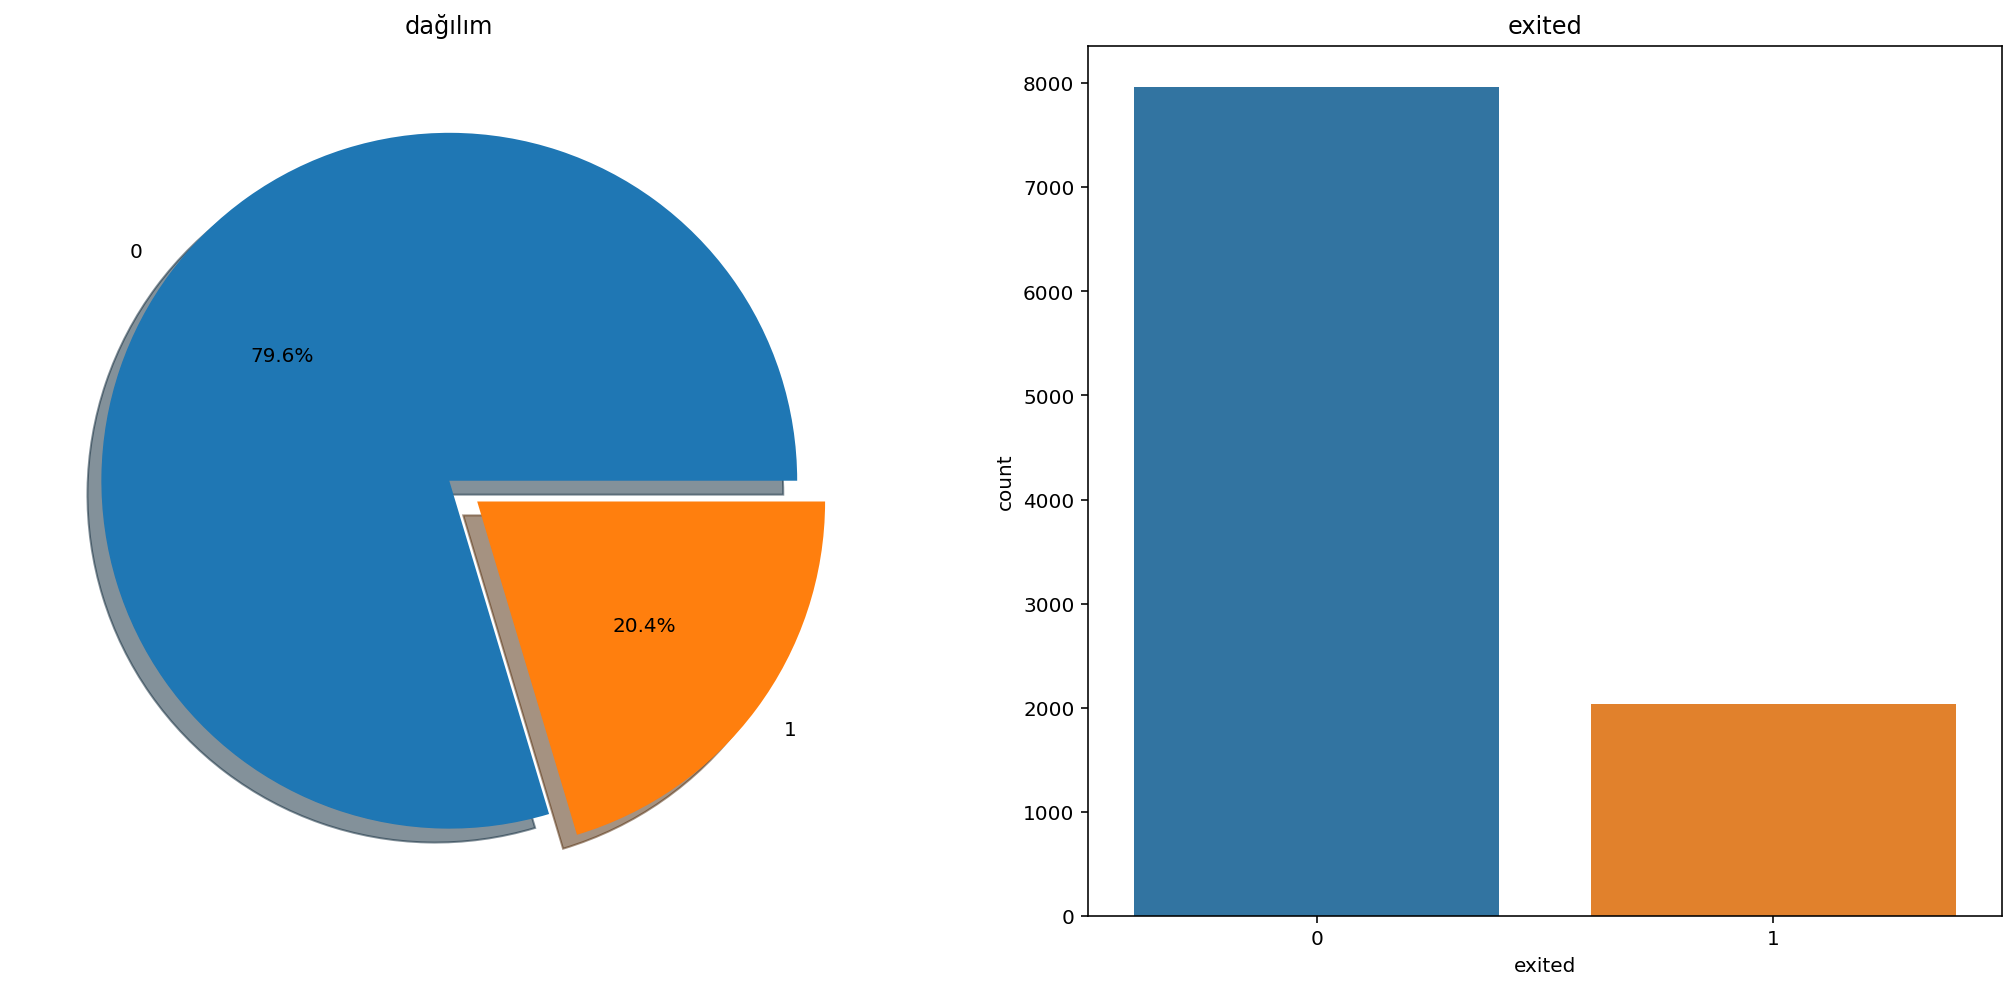

In [36]:
# The distribution of the dependent variable in the dataset is plotted as pie and columns graphs.
f,ax=plt.subplots(1,2,figsize=(18,8))
df['exited'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('dağılım')
ax[0].set_ylabel('')
sns.countplot('exited',data=df,ax=ax[1])
ax[1].set_title('exited')
plt.show()

<AxesSubplot:xlabel='isactivemember', ylabel='count'>

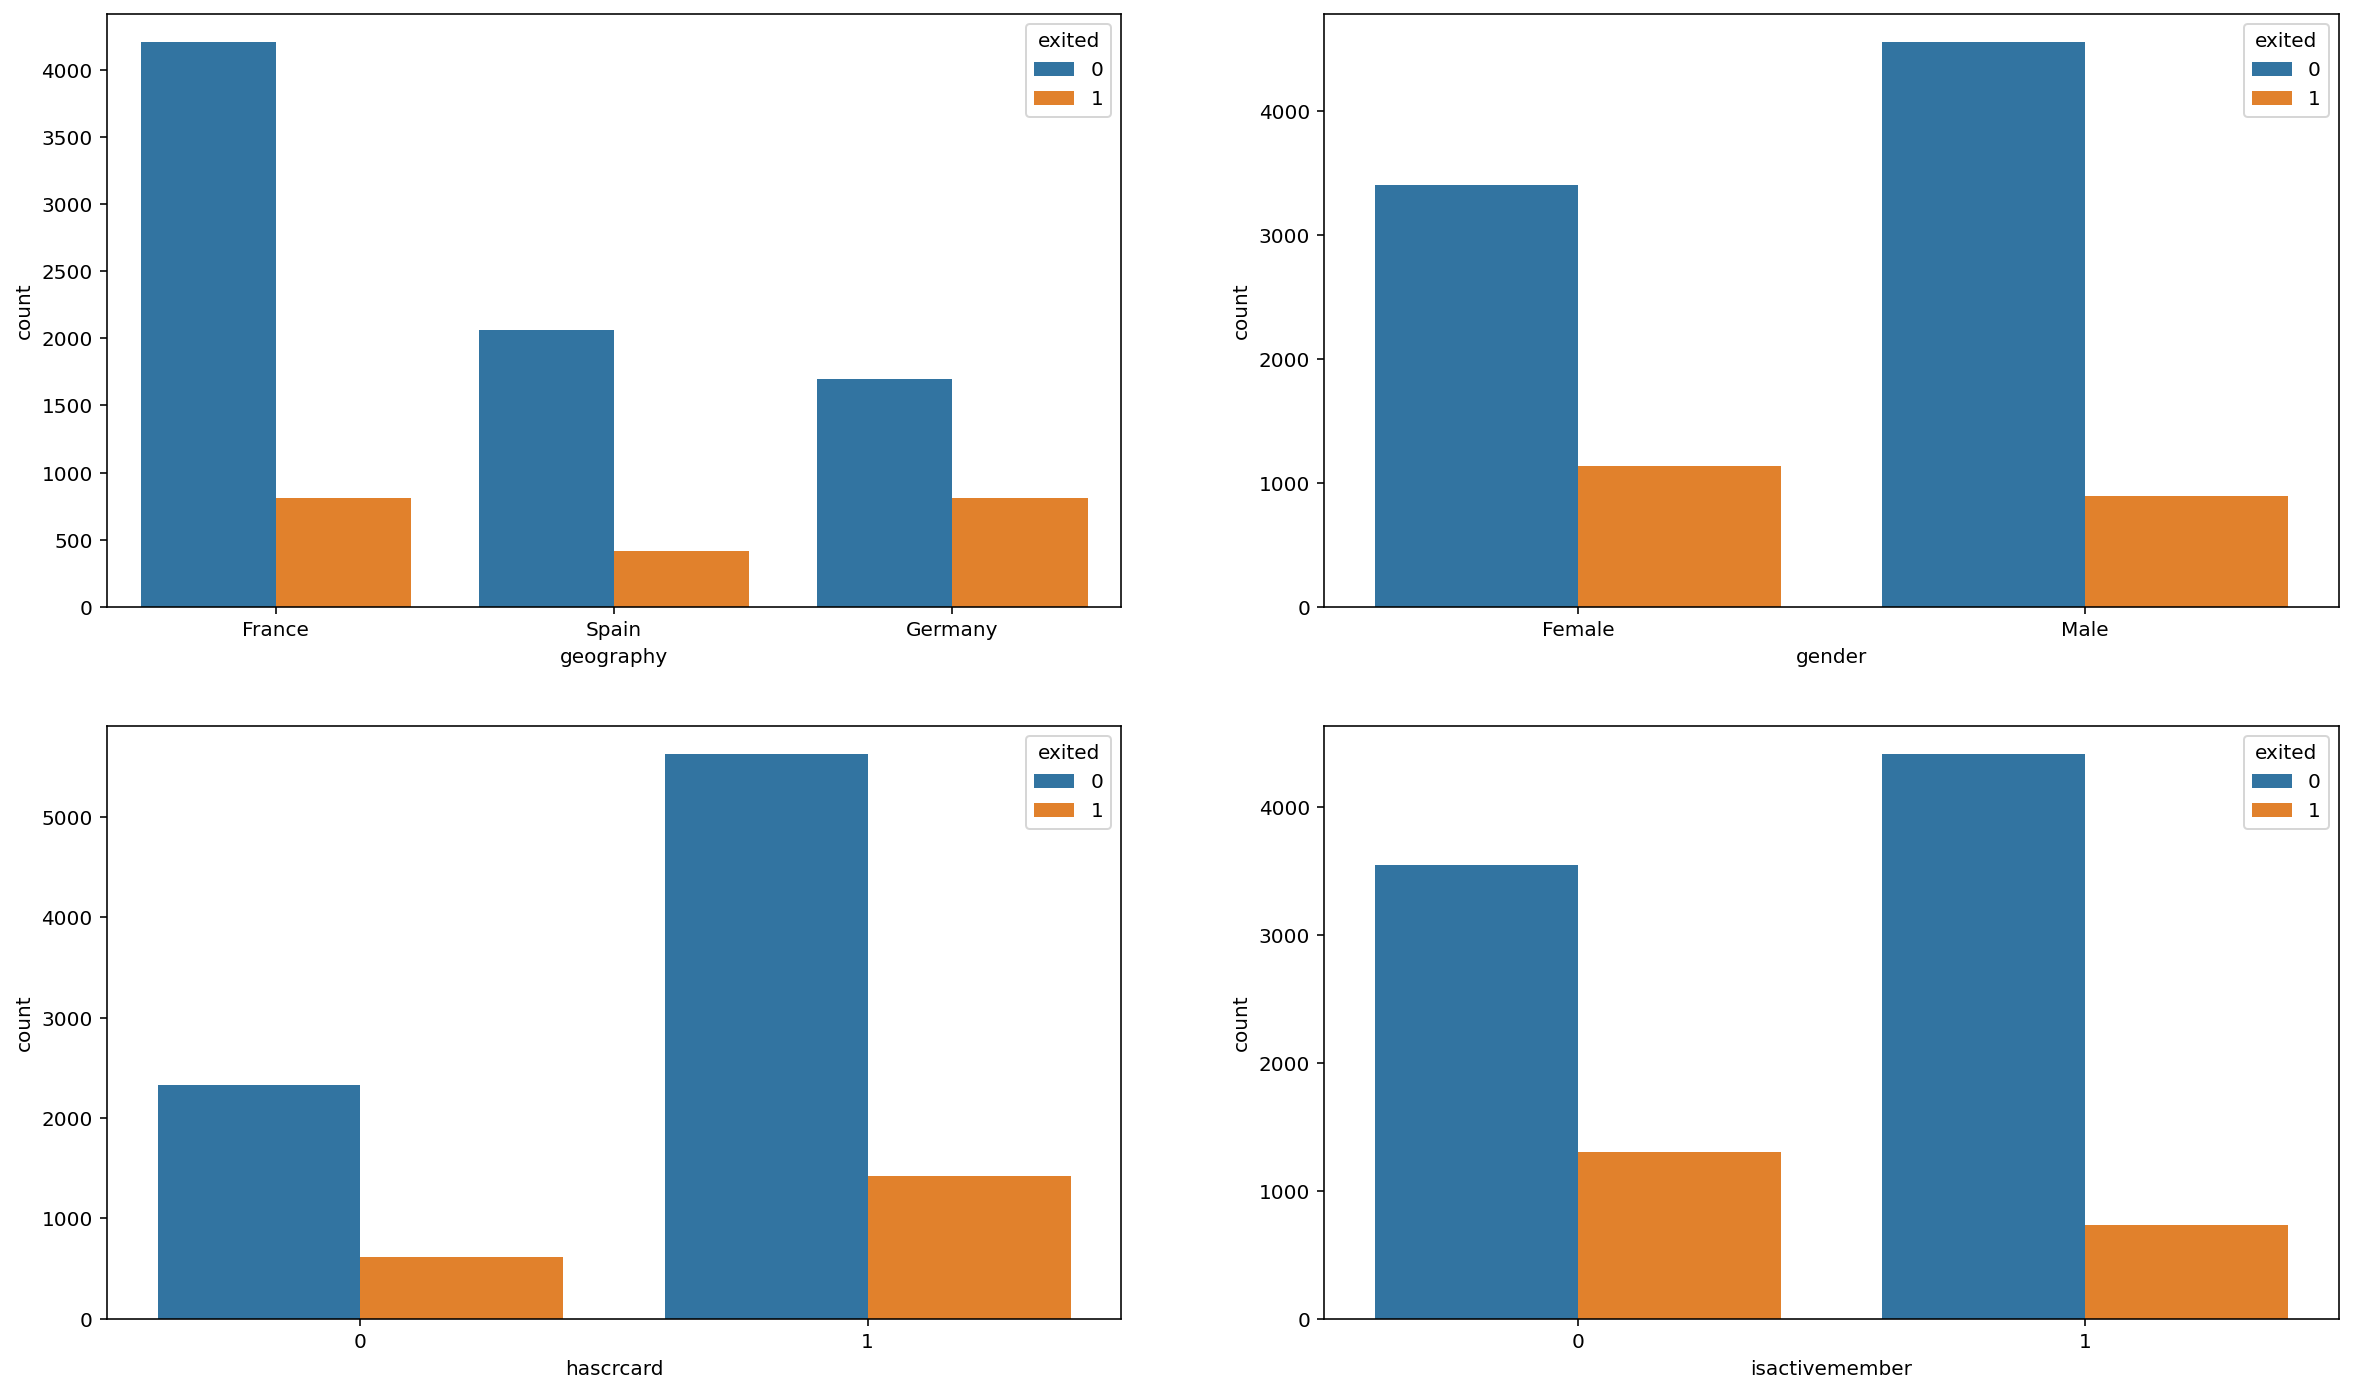

In [37]:
# Plotted the categorical variables on the basis of the graph of the column according to the dependent variable.
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='geography', hue = 'exited',data = df, ax=axarr[0][0])
sns.countplot(x='gender', hue = 'exited',data = df, ax=axarr[0][1])
sns.countplot(x='hascrcard', hue = 'exited',data = df, ax=axarr[1][0])
sns.countplot(x='isactivemember', hue = 'exited',data = df, ax=axarr[1][1])

In [38]:
# The distribution of the dependent variable according to the gender variable is plotted in the pie chart.
import plotly.express as px
fig = px.pie(df, values =df.groupby("gender")["exited"].value_counts(), names = ["Female,0","Female 1","Male,0","Male,1"])
fig.show()

In [39]:
# Dependent variable was plotted according to age and geography variable.
import plotly.express as px
fig = px.bar(df,y = "exited", x = "age" , color = "geography")
fig.show()

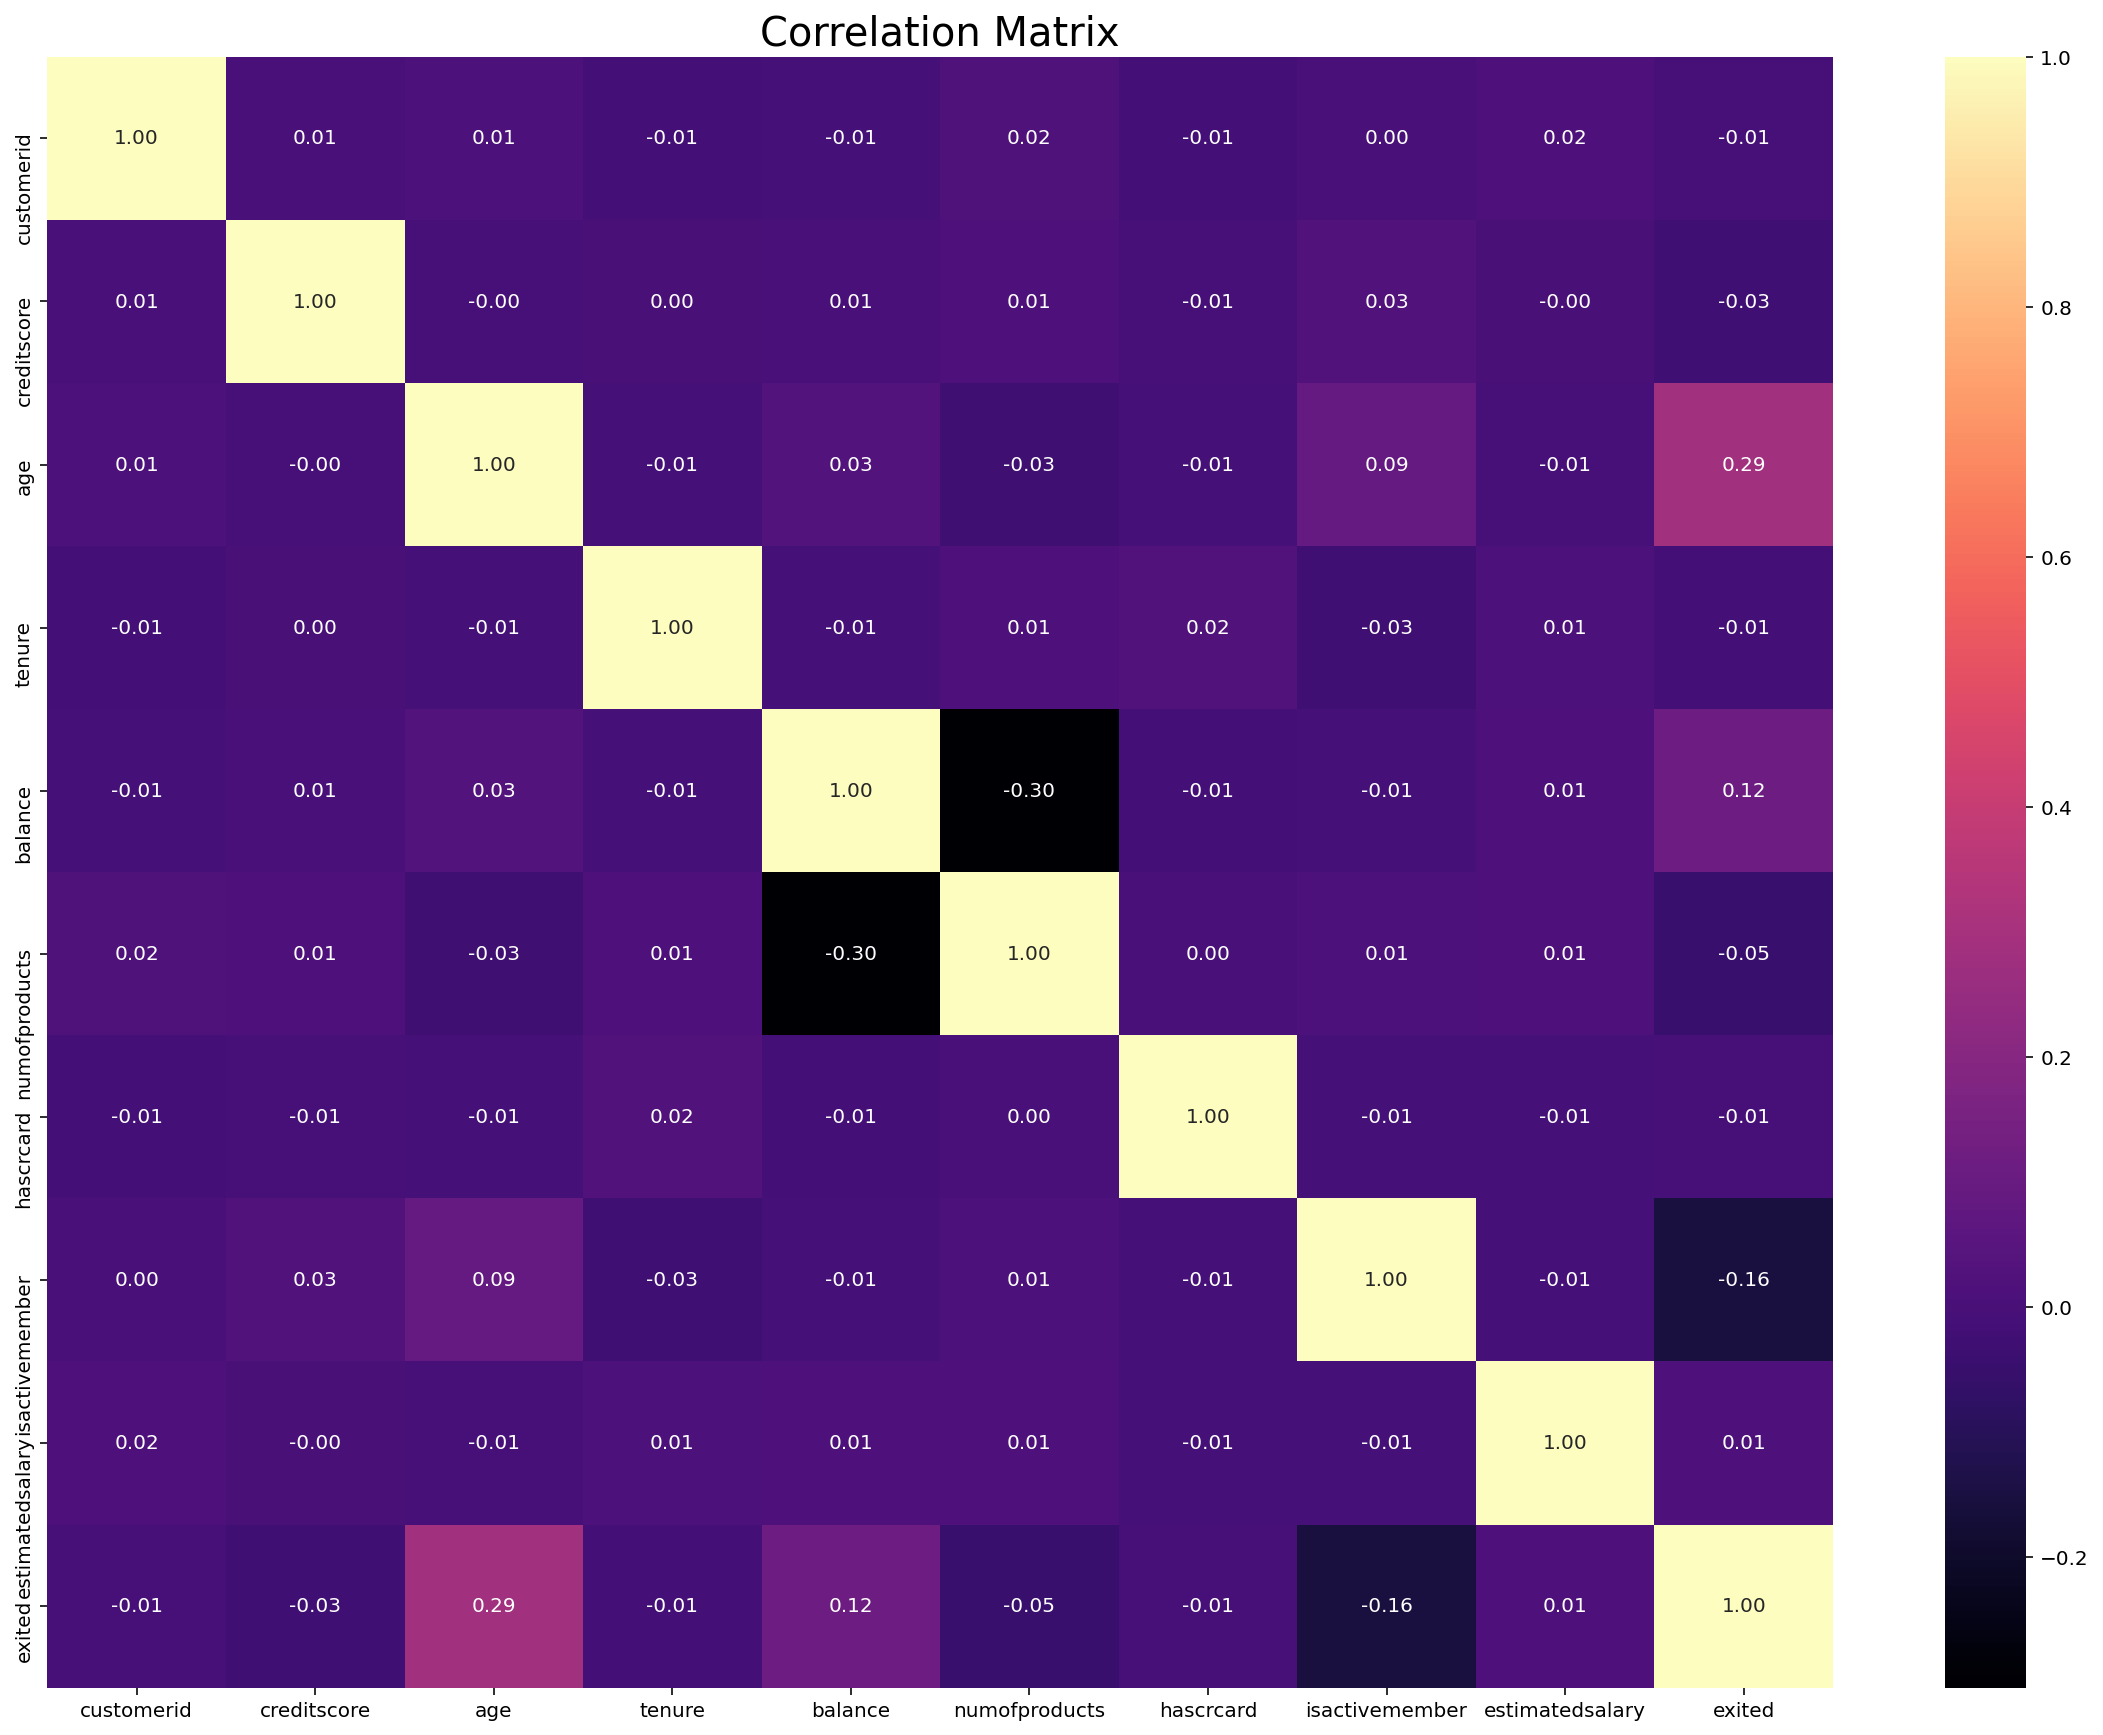

In [40]:
# Correlation Matrix
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

<AxesSubplot:xlabel='exited', ylabel='estimatedsalary'>

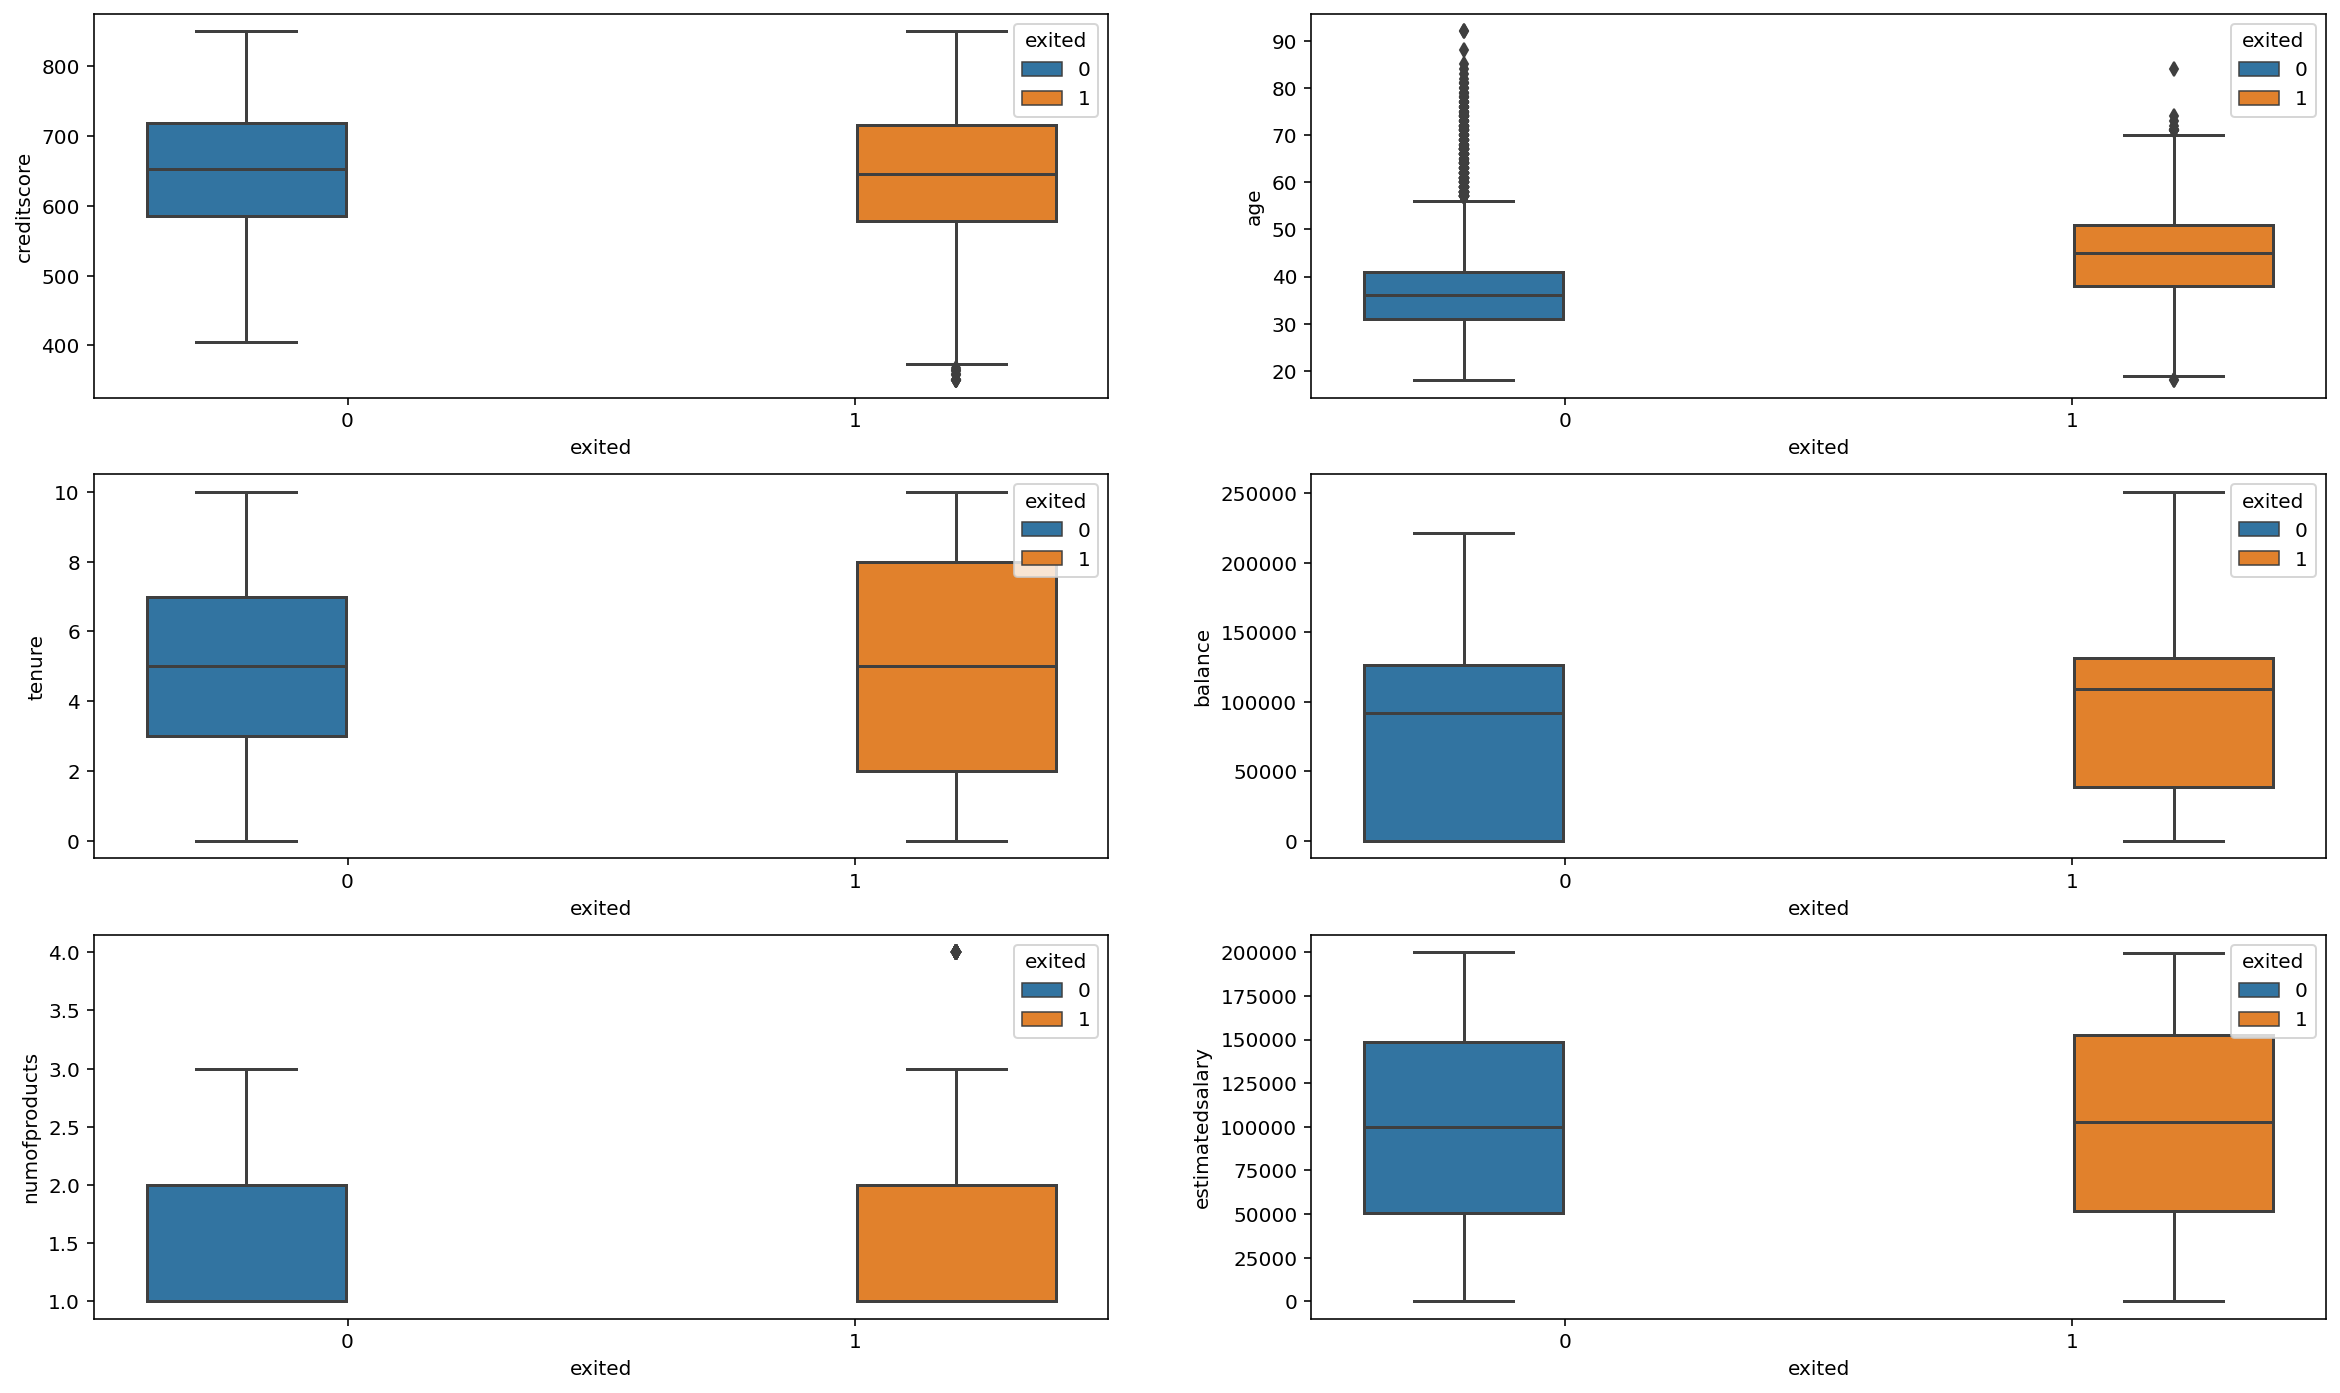

In [41]:
# Boxplot graph for outlier observation analysis
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='creditscore',x = 'exited', hue = 'exited',data = df, ax=axarr[0][0])
sns.boxplot(y='age',x = 'exited', hue = 'exited',data = df , ax=axarr[0][1])
sns.boxplot(y='tenure',x = 'exited', hue = 'exited',data = df, ax=axarr[1][0])
sns.boxplot(y='balance',x = 'exited', hue = 'exited',data = df, ax=axarr[1][1])
sns.boxplot(y='numofproducts',x = 'exited', hue = 'exited',data = df, ax=axarr[2][0])
sns.boxplot(y='estimatedsalary',x = 'exited', hue = 'exited',data = df, ax=axarr[2][1])

# 3) Data Preprocessing

## 3.1) Missing and Outlier Observation Analysis

In [42]:
# Missing Observation Analysis
df.isnull().sum()

customerid         0
surname            0
creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
NewAge             0
dtype: int64

In [43]:
# Outlier Observation Analysis
for feature in df[['creditscore','tenure', 'balance','estimatedsalary']]:
    
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if df[(df[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

creditscore no
tenure no
balance no
estimatedsalary no


## 3.2) Feature Engineering

In [44]:
df["NewAGT"] = df["age"] - df["tenure"]
df["CreditsScore"] = pd.qcut(df['creditscore'], 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
df["AgeScore"] = pd.qcut(df['age'], 8, labels = [1, 2, 3, 4, 5, 6, 7, 8])
df["BalanceScore"] = pd.qcut(df['balance'].rank(method="first"), 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
df["EstSalaryScore"] = pd.qcut(df['estimatedsalary'], 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
df["NewEstimatedSalary"] = df["estimatedsalary"] / 12 

In [45]:
df.head()

customerid   surname  creditscore geography  gender  age  tenure  \
RowNumber                                                                     
1            15634602  Hargrave          619    France  Female   42       2   
2            15647311      Hill          608     Spain  Female   41       1   
3            15619304      Onio          502    France  Female   42       8   
4            15701354      Boni          699    France  Female   39       1   
5            15737888  Mitchell          850     Spain  Female   43       2   

             balance  numofproducts  hascrcard  isactivemember  \
RowNumber                                                        
1               0.00              1          1               1   
2           83807.86              1          0               1   
3          159660.80              3          1               0   
4               0.00              2          0               0   
5          125510.82              1          1               1   

           estimatedsalary  exited        NewAge  NewAGT CreditsScore  \
RowNumber                                                               
1                101348.88       1  (40.0, 46.0]      40            4   
2                112542.58       0  (40.0, 46.0]      40            4   
3                113931.57       1  (40.0, 46.0]      34            1   
4                 93826.63       0  (35.0, 40.0]      38            7   
5                 79084.10       0  (40.0, 46.0]      41           10   

          AgeScore BalanceScore EstSalaryScore  NewEstimatedSalary  
RowNumber                                                           
1                6            1              6         8445.740000  
2                6            5              6         9378.548333  
3                6           10              6         9494.297500  
4                5            1              5         7818.885833  
5                6            8              4         6590.341667

## 3.3) One Hot Encoding

In [46]:
df = pd.get_dummies(df, columns =["geography", "gender"], drop_first = True)

In [47]:
df.head()

customerid   surname  creditscore  age  tenure    balance  \
RowNumber                                                              
1            15634602  Hargrave          619   42       2       0.00   
2            15647311      Hill          608   41       1   83807.86   
3            15619304      Onio          502   42       8  159660.80   
4            15701354      Boni          699   39       1       0.00   
5            15737888  Mitchell          850   43       2  125510.82   

           numofproducts  hascrcard  isactivemember  estimatedsalary  exited  \
RowNumber                                                                      
1                      1          1               1        101348.88       1   
2                      1          0               1        112542.58       0   
3                      3          1               0        113931.57       1   
4                      2          0               0         93826.63       0   
5                      1          1               1         79084.10       0   

                 NewAge  NewAGT CreditsScore AgeScore BalanceScore  \
RowNumber                                                            
1          (40.0, 46.0]      40            4        6            1   
2          (40.0, 46.0]      40            4        6            5   
3          (40.0, 46.0]      34            1        6           10   
4          (35.0, 40.0]      38            7        5            1   
5          (40.0, 46.0]      41           10        6            8   

          EstSalaryScore  NewEstimatedSalary  geography_Germany  \
RowNumber                                                         
1                      6         8445.740000                  0   
2                      6         9378.548333                  0   
3                      6         9494.297500                  0   
4                      5         7818.885833                  0   
5                      4         6590.341667                  0   

           geography_Spain  gender_Male  
RowNumber                                
1                        0            0  
2                        1            0  
3                        0            0  
4                        0            0  
5                        1            0

In [48]:
df = df.drop(["customerid","surname","NewAge"], axis = 1)

In [49]:
df.head()

creditscore  age  tenure    balance  numofproducts  hascrcard  \
RowNumber                                                                  
1                  619   42       2       0.00              1          1   
2                  608   41       1   83807.86              1          0   
3                  502   42       8  159660.80              3          1   
4                  699   39       1       0.00              2          0   
5                  850   43       2  125510.82              1          1   

           isactivemember  estimatedsalary  exited  NewAGT CreditsScore  \
RowNumber                                                                 
1                       1        101348.88       1      40            4   
2                       1        112542.58       0      40            4   
3                       0        113931.57       1      34            1   
4                       0         93826.63       0      38            7   
5                       1         79084.10       0      41           10   

          AgeScore BalanceScore EstSalaryScore  NewEstimatedSalary  \
RowNumber                                                            
1                6            1              6         8445.740000   
2                6            5              6         9378.548333   
3                6           10              6         9494.297500   
4                5            1              5         7818.885833   
5                6            8              4         6590.341667   

           geography_Germany  geography_Spain  gender_Male  
RowNumber                                                   
1                          0                0            0  
2                          0                1            0  
3                          0                0            0  
4                          0                0            0  
5                          0                1            0

## 3.4) Scaling

In [50]:
cat_df = df[["geography_Germany", "geography_Spain", "gender_Male", "hascrcard","isactivemember"]]

In [51]:
cat_df.head()

geography_Germany  geography_Spain  gender_Male  hascrcard  \
RowNumber                                                               
1                          0                0            0          1   
2                          0                1            0          0   
3                          0                0            0          1   
4                          0                0            0          0   
5                          0                1            0          1   

           isactivemember  
RowNumber                  
1                       1  
2                       1  
3                       0  
4                       0  
5                       1

In [52]:
y = df["exited"]
X = df.drop(["exited","geography_Germany", "geography_Spain", "gender_Male", "hascrcard","isactivemember"], axis = 1)
cols = X.columns
index = X.index

In [53]:
X.head()    

creditscore  age  tenure    balance  numofproducts  \
RowNumber                                                       
1                  619   42       2       0.00              1   
2                  608   41       1   83807.86              1   
3                  502   42       8  159660.80              3   
4                  699   39       1       0.00              2   
5                  850   43       2  125510.82              1   

           estimatedsalary  NewAGT CreditsScore AgeScore BalanceScore  \
RowNumber                                                               
1                101348.88      40            4        6            1   
2                112542.58      40            4        6            5   
3                113931.57      34            1        6           10   
4                 93826.63      38            7        5            1   
5                 79084.10      41           10        6            8   

          EstSalaryScore  NewEstimatedSalary  
RowNumber                                     
1                      6         8445.740000  
2                      6         9378.548333  
3                      6         9494.297500  
4                      5         7818.885833  
5                      4         6590.341667

In [54]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = cols, index = index)

Robust Scaler, Normalizasyon ile benzer şekilde çalışır. Aykırı değerlere sahip verilerde daha iyi sonuçlar verebilir. Yine veri dağılımı ile benzerlik gösterir ancak aykırı değerler dışarıda kalır. Medyan değeri sonradan kullanılmak üzere elenir ve değerler 1.ve 3. kartil aralığına oturtulur.

In [55]:
X = pd.concat([X,cat_df], axis = 1)

In [56]:
X.head()

creditscore       age  tenure   balance  numofproducts  \
RowNumber                                                           
1            -0.246269  0.416667   -0.75 -0.761480            0.0   
2            -0.328358  0.333333   -1.00 -0.104906            0.0   
3            -1.119403  0.416667    0.75  0.489346            2.0   
4             0.350746  0.166667   -1.00 -0.761480            1.0   
5             1.477612  0.500000   -0.75  0.221806            0.0   

           estimatedsalary    NewAGT  CreditsScore  AgeScore  BalanceScore  \
RowNumber                                                                    
1                 0.011739  0.666667          -0.2      0.50          -0.9   
2                 0.125512  0.666667          -0.2      0.50          -0.1   
3                 0.139630  0.166667          -0.8      0.50           0.9   
4                -0.064717  0.500000           0.4      0.25          -0.9   
5                -0.214561  0.750000           1.0      0.50           0.5   

           EstSalaryScore  NewEstimatedSalary  geography_Germany  \
RowNumber                                                          
1                     0.1            0.011739                  0   
2                     0.1            0.125512                  0   
3                     0.1            0.139630                  0   
4                    -0.1           -0.064717                  0   
5                    -0.3           -0.214561                  0   

           geography_Spain  gender_Male  hascrcard  isactivemember  
RowNumber                                                           
1                        0            0          1               1  
2                        1            0          0               1  
3                        0            0          1               0  
4                        0            0          0               0  
5                        1            0          1               1

In [57]:
y.head()

RowNumber
1    1
2    0
3    1
4    0
5    0
Name: exited, dtype: int64

In [58]:
print(X.shape, y.shape)

(10000, 17) (10000,)


## 3.5) Train-Test Separation & Balancing

In [104]:
# Train-Test Separation
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=12345)


In [135]:
!pip install imblearn

In [137]:
# Because it's an unstable data set, we're going to increase the number of samples.
# References: https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.combine.SMOTETomek.html

#!pip install imblearn.combine 
from imblearn.combine import SMOTETomek

smk = SMOTETomek()
# Oversample training  data
X_train, y_train = smk.fit_resample(X_train, y_train)

# Oversample validation data
X_test, y_test = smk.fit_resample(X_test, y_test)

In [138]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(12490, 17) (3086, 17) (12490,) (3086,)


# 4) Modelling

In [139]:
models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 12345)))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('SVM', SVC(gamma='auto', random_state = 12345)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345)))
models.append(("CatBoost", CatBoostClassifier(random_state = 12345, verbose = False)))

# evaluate each model in turn
results = []
names = []

## 4.1) Accuracy Score

In [140]:
for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        msg = "%s: (%f)" % (name, accuracy)
        print(msg)

LR: (0.745625)
KNN: (0.752106)
CART: (0.806546)
RF: (0.855800)
SVM: (0.803305)
XGB: (0.887233)
LightGBM: (0.911212)
CatBoost: (0.910240)


# Recall Score

In [141]:
for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        recall = recall_score(y_test, y_pred)
        msg = "%s: (%f)" % (name, recall)
        print(msg)

LR: (0.775762)
KNN: (0.727803)
CART: (0.760207)
RF: (0.779002)
SVM: (0.778354)
XGB: (0.865198)
LightGBM: (0.869734)
CatBoost: (0.863901)


## 4.2) Variable Importance Levels of All Models

In [109]:
models2 = []
models2.append(('CART', DecisionTreeClassifier( random_state = 12345)))
models2.append(('RF', RandomForestClassifier( random_state = 12345)))
models2.append(('XGB', GradientBoostingClassifier( random_state = 12345)))
models2.append(("LightGBM", LGBMClassifier( random_state = 12345)))
models2.append(("CatBoost", CatBoostClassifier(random_state = 12345, verbose = False)))

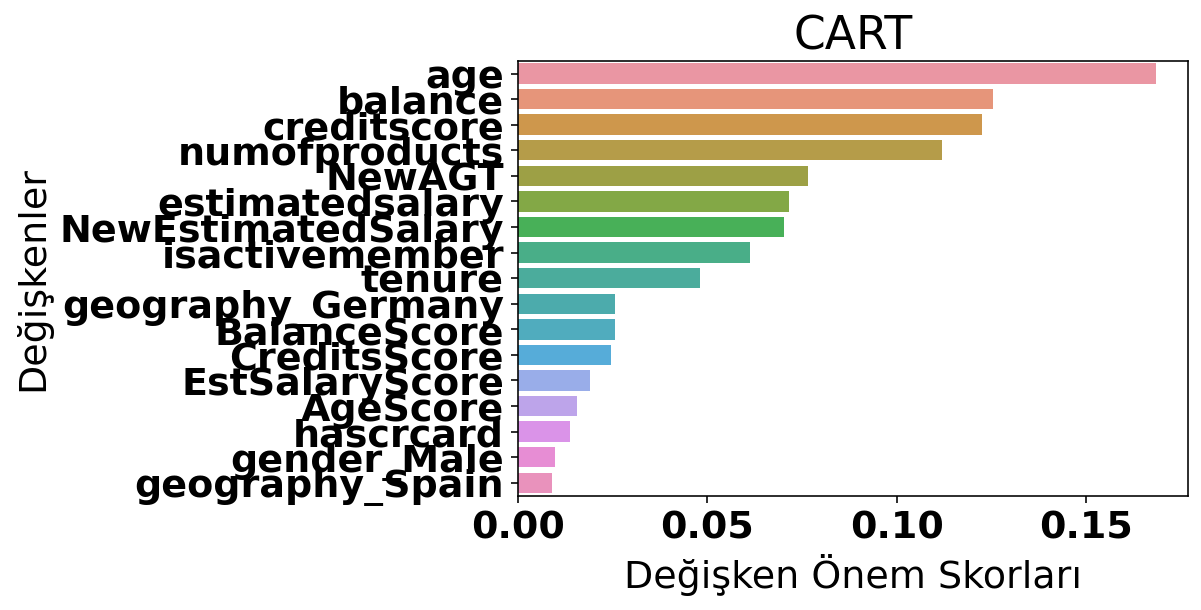

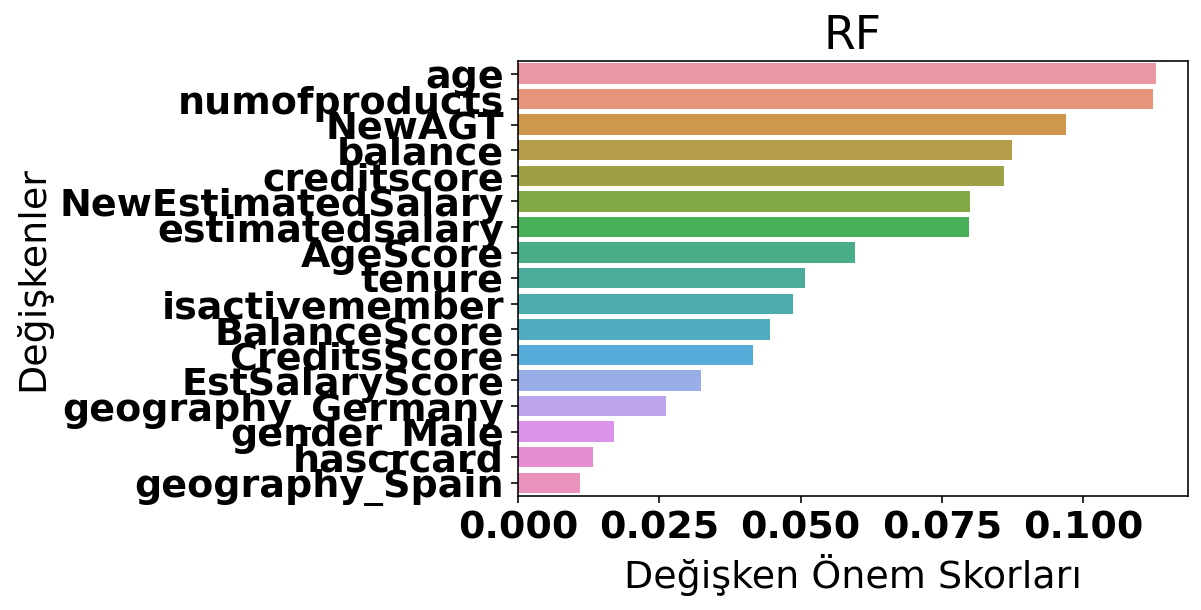

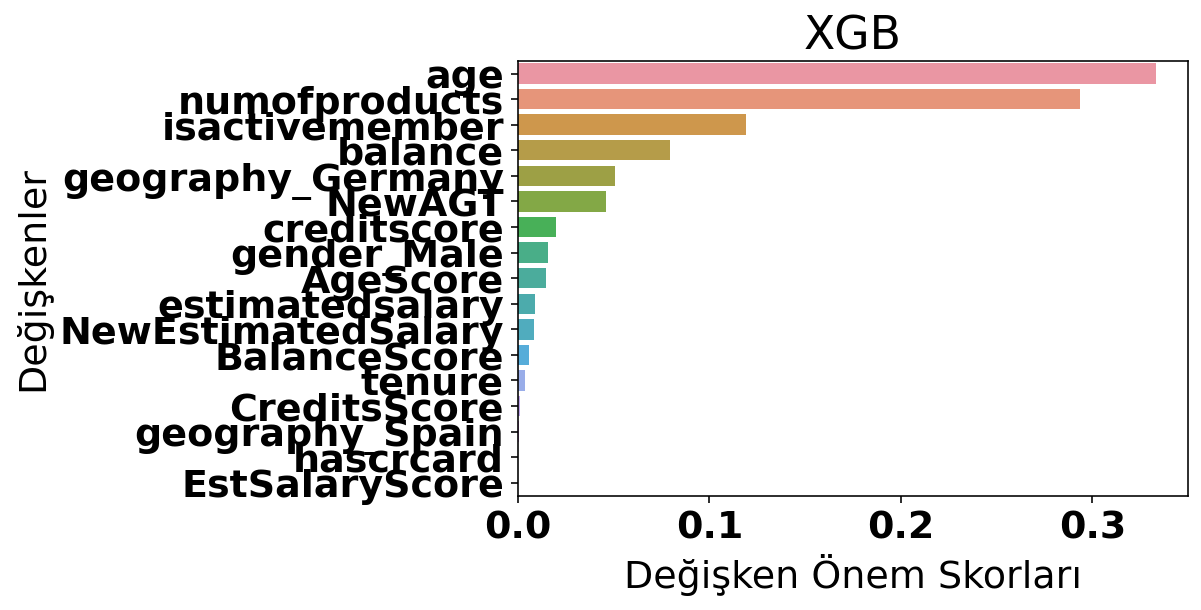

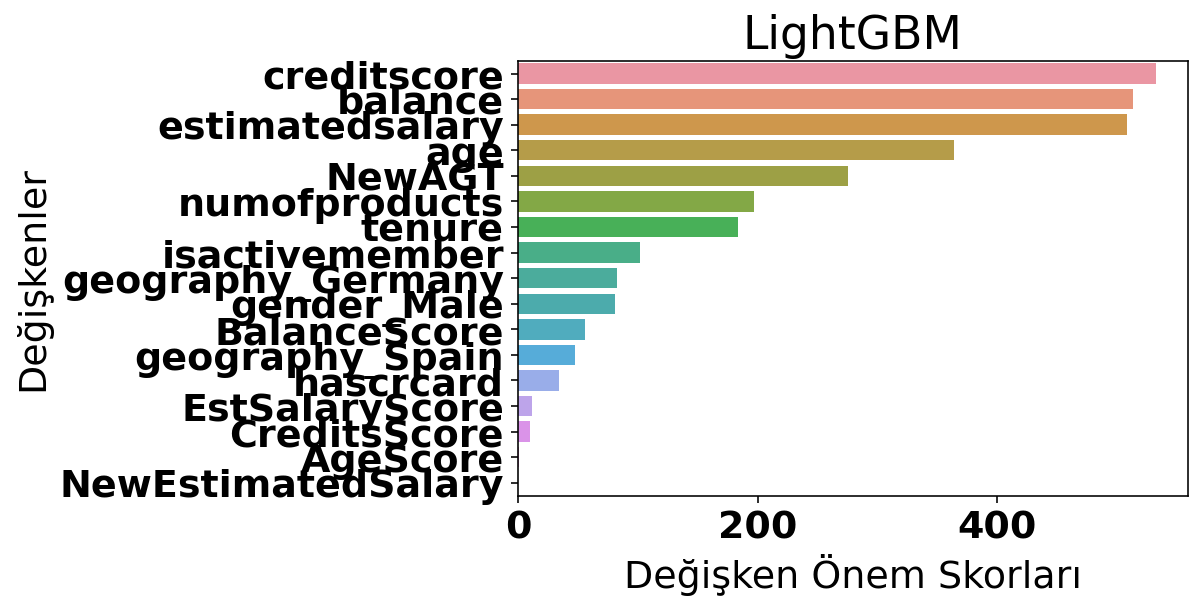

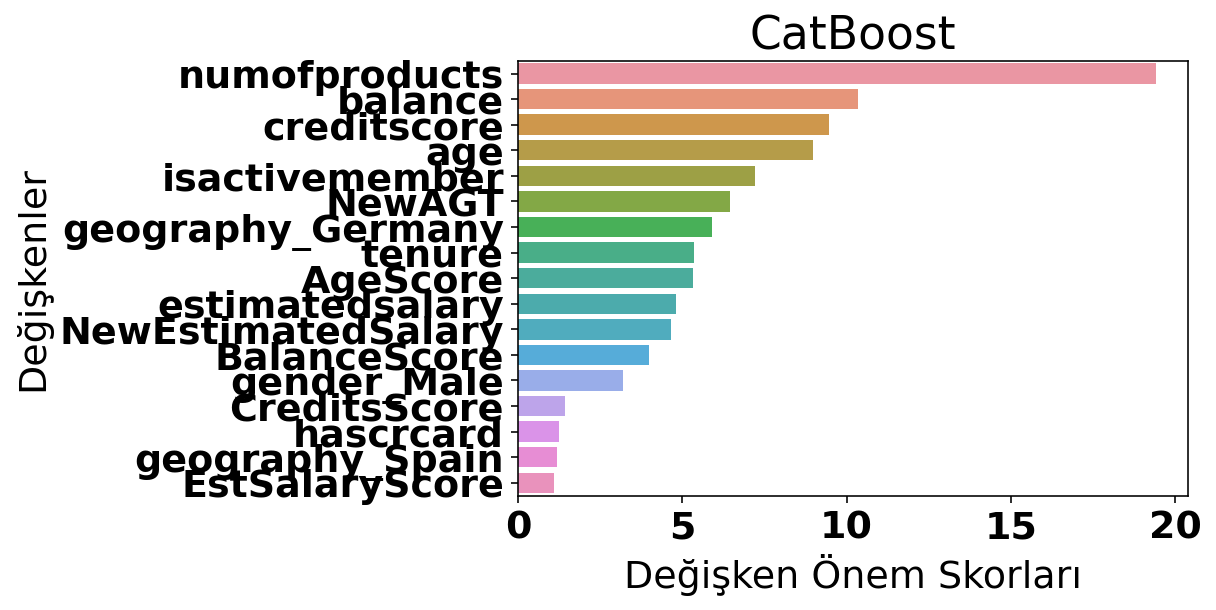

In [110]:
for name, model in models2:
        base = model.fit(X_train,y_train)
        y_pred = base.predict(X_test)
        acc_score = accuracy_score(y_test, y_pred)
        feature_imp = pd.Series(base.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

        sns.barplot(x=feature_imp, y=feature_imp.index)
        plt.xlabel('Değişken Önem Skorları')
        plt.ylabel('Değişkenler')
        plt.title(name)
        plt.show()

# 5) Model Tuning

In [111]:
# Hyperparameters have previously been obtained with the help of GridSearchCV.
models = []
models.append(('XGB', GradientBoostingClassifier(random_state = 12345,learning_rate = 0.05, max_depth = 5, min_samples_split = 2, n_estimators = 500, subsample = 0.8)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345,  learning_rate = 0.05, max_depth = 3, n_estimators = 1000)))
models.append(("CatBoost", CatBoostClassifier(random_state = 12345, verbose = False, depth = 10, iterations = 1000, l2_leaf_reg = 5, learning_rate = 0.01)))

# evaluate each model in turn
results = []
names = []

for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        msg = "%s: (%f)" % (name, accuracy)
        print(msg)

XGB: (0.855500)
LightGBM: (0.859000)
CatBoost: (0.855500)


In [142]:
# Hyperparameters have previously been obtained with the help of GridSearchCV.
models = []
models.append(('XGB', GradientBoostingClassifier(random_state = 12345,learning_rate = 0.05, max_depth = 5, min_samples_split = 2, n_estimators = 500, subsample = 0.8)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345,  learning_rate = 0.05, max_depth = 3, n_estimators = 1000)))
models.append(("CatBoost", CatBoostClassifier(random_state = 12345, verbose = False, depth = 10, iterations = 1000, l2_leaf_reg = 5, learning_rate = 0.01)))

# evaluate each model in turn
results = []
names = []

for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        recall = recall_score(y_test, y_pred)
        msg = "%s: (%f)" % (name, recall)
        print(msg)

XGB: (0.865846)
LightGBM: (0.870382)
CatBoost: (0.845755)


## 5.1) Model Tuning Variable Importance Level

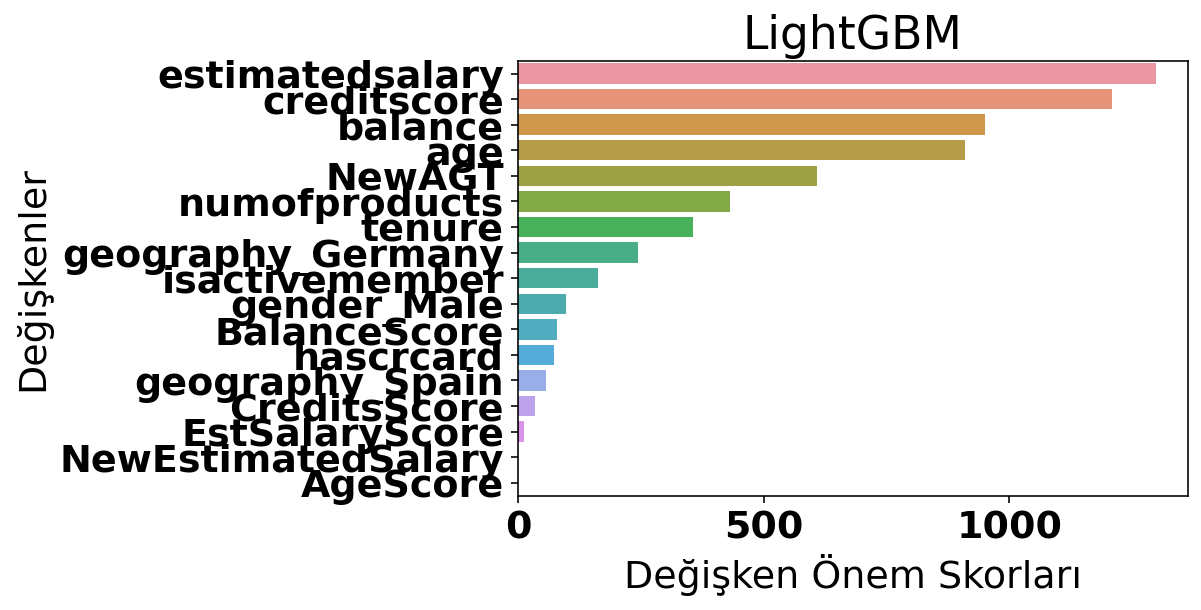

In [112]:
models2 = []
models2.append(("LightGBM", LGBMClassifier(random_state = 12345,  learning_rate = 0.05, max_depth = 3, n_estimators = 1000)))

# evaluate each model in turn
results = []
names = []

for name, model in models2:
        base = model.fit(X_train,y_train)
        y_pred = base.predict(X_test)
        acc_score = accuracy_score(y_test, y_pred)
        feature_imp = pd.Series(base.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

        sns.barplot(x=feature_imp, y=feature_imp.index)
        plt.xlabel('Değişken Önem Skorları')
        plt.ylabel('Değişkenler')
        plt.title(name)
        plt.show()

# 6) Confusion Matrix

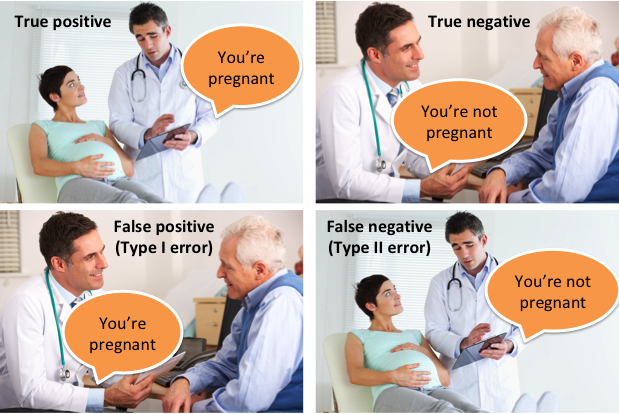

In [113]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
y_pred = model.predict(X_test)
cm_xgb = confusion_matrix(y_test, y_pred=y_pred)

TP = cm_xgb[1, 1]
TN = cm_xgb[0, 0]
FP = cm_xgb[0, 1]
FN = cm_xgb[1, 0]

In [114]:
from matplotlib import rc,rcParams
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.rcParams.update({'font.size': 19})
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontdict={'size':'16'})
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45,fontsize=12,color="blue")
    plt.yticks(tick_marks, classes,fontsize=12,color="blue")
    rc('font', weight='bold')
    fmt = '.1f'
    thresh = cm.max()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="red")

    plt.ylabel('True label',fontdict={'size':'16'})
    plt.xlabel('Predicted label',fontdict={'size':'16'})
    plt.tight_layout()

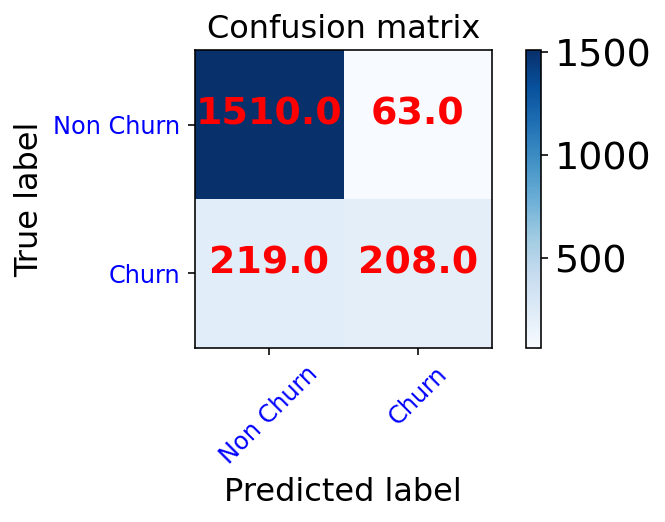

In [66]:
import itertools
plot_confusion_matrix(confusion_matrix(y_test, y_pred=y_pred), classes=['Non Churn','Churn'],
                      title='Confusion matrix')

In [115]:
tn, fp, fn, tp = cm_xgb.ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  1510
False Positives:  63
False Negatives:  219
True Positives:  208


In [116]:
df_pred = pd.DataFrame(data=[],columns=["y_test"])
df_pred["y_pred"] = y_pred
df_pred["y_test"] = y_test
df_pred.index = df_pred.index + 1
df_pred.head()

y_test  y_pred
1     NaN       1
2     NaN       0
3     NaN       0
4     1.0       0
5     NaN       0

In [117]:
FP_predicts_indexes = [] 
TP_predicts_indexes=[]
FN_predict_indexes =[]
TN_predicts_indexes  = []
for index, row in df_pred.iterrows():
    if row['y_test'] == 0 and row['y_pred'] == 1:
        FP_predicts_indexes.append(row.name)
    elif row['y_test'] == 1 and row['y_pred'] == 1:
        TP_predicts_indexes.append(row.name)
    elif row['y_test'] == 0 and row['y_pred'] == 0:
        TN_predicts_indexes.append(row.name)
    elif row['y_test'] == 1 and row['y_pred'] == 0:
        FN_predict_indexes.append(row.name)    

In [118]:
df_pred.loc[TN_predicts_indexes,"prediction_result"] = "TN"
df_pred.loc[TP_predicts_indexes,"prediction_result"] = "TP"
df_pred.loc[FP_predicts_indexes,"prediction_result"] = "FP"
df_pred.loc[FN_predict_indexes,"prediction_result"] = "FN"
df_pred.head()

y_test  y_pred prediction_result
1     NaN       1               NaN
2     NaN       0               NaN
3     NaN       0               NaN
4     1.0       0                FN
5     NaN       0               NaN

In [119]:
df_pred[df_pred["prediction_result"] == "FP"].head()

y_test  y_pred prediction_result
69      0.0       1                FP
156     0.0       1                FP
161     0.0       1                FP
271     0.0       1                FP
356     0.0       1                FP

In [120]:
df_pred[df_pred["prediction_result"] == "FN"].head()

y_test  y_pred prediction_result
4       1.0       0                FN
141     1.0       0                FN
145     1.0       0                FN
157     1.0       0                FN
168     1.0       0                FN

# 7) ROC Curve

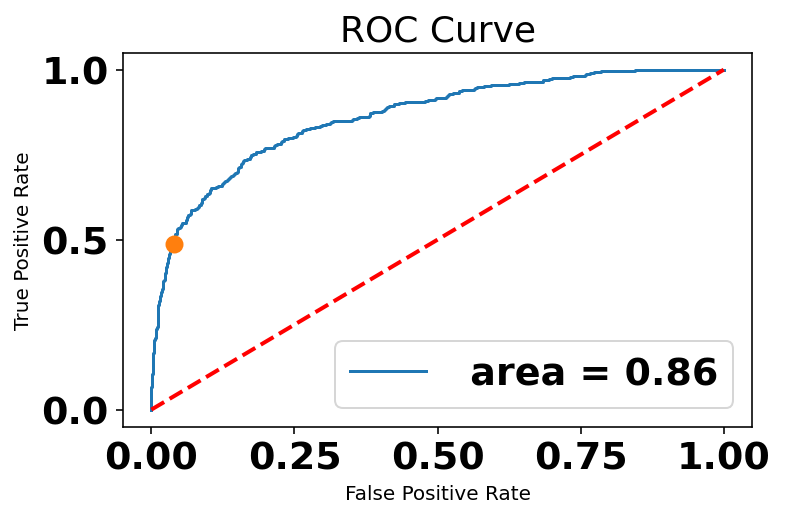

In [121]:
lbgm_tuned = model
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, roc_curve, auc, average_precision_score
y_pred_prob = lbgm_tuned.predict_proba(X_test)[:,1]
fig, ax = plt.subplots()
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr,tpr)
ax.plot(fpr,tpr, label = " area = {:0.2f}".format(roc_auc))
ax.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax.set_xlabel("False Positive Rate", fontsize = 10)
ax.set_ylabel("True Positive Rate", fontsize = 10)
ax.set_title("ROC Curve", fontsize = 18)
ax.legend(loc = 'best')

close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

# Deep Learning

# Modelling & Model Performance

In [122]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [75]:
X_train.shape

(8000, 17)

In [123]:
X_test.shape

(2000, 17)

In [124]:
model = Sequential()

model.add(Dense(30, activation = "relu"))
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [78]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose=1)

Epoch 1/1000
225/225 [==============================] - 1s 3ms/step - loss: 0.4439 - accuracy: 0.8119 - val_loss: 0.4452 - val_accuracy: 0.8112
Epoch 2/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4078 - accuracy: 0.8314 - val_loss: 0.4318 - val_accuracy: 0.8112
Epoch 3/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.3944 - accuracy: 0.8379 - val_loss: 0.4265 - val_accuracy: 0.8050
Epoch 4/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.3831 - accuracy: 0.8406 - val_loss: 0.4083 - val_accuracy: 0.8275
Epoch 5/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.3715 - accuracy: 0.8440 - val_loss: 0.3987 - val_accuracy: 0.8300
Epoch 6/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.3618 - accuracy: 0.8479 - val_loss: 0.3880 - val_accuracy: 0.8325
Epoch 7/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.3522 - accuracy: 0.8528 - val_loss: 0.3818 - val_accuracy:

225/225 [==============================] - 0s 1ms/step - loss: 0.3023 - accuracy: 0.8732 - val_loss: 0.3637 - val_accuracy: 0.8475
Epoch 58/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.3019 - accuracy: 0.8707 - val_loss: 0.3721 - val_accuracy: 0.8512
Epoch 59/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.3007 - accuracy: 0.8737 - val_loss: 0.3745 - val_accuracy: 0.8537
Epoch 60/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.3007 - accuracy: 0.8711 - val_loss: 0.3666 - val_accuracy: 0.8487
Epoch 61/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.3007 - accuracy: 0.8729 - val_loss: 0.3698 - val_accuracy: 0.8487
Epoch 62/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2997 - accuracy: 0.8750 - val_loss: 0.3725 - val_accuracy: 0.8487
Epoch 63/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2997 - accuracy: 0.8751 - val_loss: 0.3678 - val_accuracy: 0.8512

225/225 [==============================] - 0s 2ms/step - loss: 0.2865 - accuracy: 0.8790 - val_loss: 0.3873 - val_accuracy: 0.8413
Epoch 114/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2849 - accuracy: 0.8811 - val_loss: 0.3888 - val_accuracy: 0.8475
Epoch 115/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2875 - accuracy: 0.8817 - val_loss: 0.3777 - val_accuracy: 0.8475
Epoch 116/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2857 - accuracy: 0.8824 - val_loss: 0.3799 - val_accuracy: 0.8500
Epoch 117/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2853 - accuracy: 0.8808 - val_loss: 0.3810 - val_accuracy: 0.8462
Epoch 118/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2849 - accuracy: 0.8824 - val_loss: 0.3877 - val_accuracy: 0.8462
Epoch 119/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2857 - accuracy: 0.8828 - val_loss: 0.3780 - val_accuracy: 

225/225 [==============================] - 0s 1ms/step - loss: 0.2758 - accuracy: 0.8879 - val_loss: 0.3922 - val_accuracy: 0.8425
Epoch 170/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2774 - accuracy: 0.8869 - val_loss: 0.3916 - val_accuracy: 0.8413
Epoch 171/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2762 - accuracy: 0.8868 - val_loss: 0.3925 - val_accuracy: 0.8413
Epoch 172/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2759 - accuracy: 0.8864 - val_loss: 0.3909 - val_accuracy: 0.8425
Epoch 173/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2747 - accuracy: 0.8833 - val_loss: 0.3984 - val_accuracy: 0.8400
Epoch 174/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2745 - accuracy: 0.8868 - val_loss: 0.3941 - val_accuracy: 0.8300
Epoch 175/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2749 - accuracy: 0.8874 - val_loss: 0.3961 - val_accuracy: 

225/225 [==============================] - 0s 1ms/step - loss: 0.2683 - accuracy: 0.8889 - val_loss: 0.3955 - val_accuracy: 0.8338
Epoch 226/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.2678 - accuracy: 0.8872 - val_loss: 0.3995 - val_accuracy: 0.8363
Epoch 227/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2673 - accuracy: 0.8894 - val_loss: 0.4019 - val_accuracy: 0.8325
Epoch 228/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2677 - accuracy: 0.8890 - val_loss: 0.3935 - val_accuracy: 0.8288
Epoch 229/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2682 - accuracy: 0.8872 - val_loss: 0.4035 - val_accuracy: 0.8250
Epoch 230/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2678 - accuracy: 0.8885 - val_loss: 0.3967 - val_accuracy: 0.8350
Epoch 231/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2678 - accuracy: 0.8897 - val_loss: 0.4054 - val_accuracy: 

225/225 [==============================] - 0s 1ms/step - loss: 0.2627 - accuracy: 0.8921 - val_loss: 0.4121 - val_accuracy: 0.8288
Epoch 282/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2619 - accuracy: 0.8899 - val_loss: 0.4156 - val_accuracy: 0.8325
Epoch 283/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2632 - accuracy: 0.8901 - val_loss: 0.4140 - val_accuracy: 0.8313
Epoch 284/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2636 - accuracy: 0.8913 - val_loss: 0.4182 - val_accuracy: 0.8288
Epoch 285/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2616 - accuracy: 0.8924 - val_loss: 0.4098 - val_accuracy: 0.8413
Epoch 286/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2640 - accuracy: 0.8928 - val_loss: 0.4118 - val_accuracy: 0.8338
Epoch 287/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2625 - accuracy: 0.8910 - val_loss: 0.4139 - val_accuracy: 

225/225 [==============================] - 0s 1ms/step - loss: 0.2572 - accuracy: 0.8931 - val_loss: 0.4325 - val_accuracy: 0.8300
Epoch 338/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2574 - accuracy: 0.8924 - val_loss: 0.4225 - val_accuracy: 0.8288
Epoch 339/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2579 - accuracy: 0.8894 - val_loss: 0.4306 - val_accuracy: 0.8275
Epoch 340/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2557 - accuracy: 0.8925 - val_loss: 0.4389 - val_accuracy: 0.8263
Epoch 341/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2589 - accuracy: 0.8924 - val_loss: 0.4371 - val_accuracy: 0.8325
Epoch 342/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2563 - accuracy: 0.8953 - val_loss: 0.4324 - val_accuracy: 0.8363
Epoch 343/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2577 - accuracy: 0.8911 - val_loss: 0.4345 - val_accuracy: 

225/225 [==============================] - 0s 1ms/step - loss: 0.2537 - accuracy: 0.8942 - val_loss: 0.4382 - val_accuracy: 0.8288
Epoch 394/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.2557 - accuracy: 0.8910 - val_loss: 0.4320 - val_accuracy: 0.8275
Epoch 395/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.2526 - accuracy: 0.8963 - val_loss: 0.4410 - val_accuracy: 0.8325
Epoch 396/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2545 - accuracy: 0.8943 - val_loss: 0.4455 - val_accuracy: 0.8300
Epoch 397/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2525 - accuracy: 0.8954 - val_loss: 0.4407 - val_accuracy: 0.8288
Epoch 398/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.2548 - accuracy: 0.8951 - val_loss: 0.4408 - val_accuracy: 0.8263
Epoch 399/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.2522 - accuracy: 0.8957 - val_loss: 0.4486 - val_accuracy: 

225/225 [==============================] - 0s 1ms/step - loss: 0.2504 - accuracy: 0.8947 - val_loss: 0.4424 - val_accuracy: 0.8300
Epoch 450/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2494 - accuracy: 0.8956 - val_loss: 0.4524 - val_accuracy: 0.8250
Epoch 451/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2495 - accuracy: 0.8965 - val_loss: 0.4438 - val_accuracy: 0.8288
Epoch 452/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2501 - accuracy: 0.8967 - val_loss: 0.4339 - val_accuracy: 0.8300
Epoch 453/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2494 - accuracy: 0.8972 - val_loss: 0.4412 - val_accuracy: 0.8350
Epoch 454/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2501 - accuracy: 0.8968 - val_loss: 0.4475 - val_accuracy: 0.8338
Epoch 455/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.2497 - accuracy: 0.8978 - val_loss: 0.4472 - val_accuracy: 

225/225 [==============================] - 0s 1ms/step - loss: 0.2467 - accuracy: 0.8964 - val_loss: 0.4476 - val_accuracy: 0.8300
Epoch 506/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2462 - accuracy: 0.8972 - val_loss: 0.4478 - val_accuracy: 0.8325
Epoch 507/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2457 - accuracy: 0.8997 - val_loss: 0.4497 - val_accuracy: 0.8250
Epoch 508/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2460 - accuracy: 0.8979 - val_loss: 0.4504 - val_accuracy: 0.8313
Epoch 509/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2452 - accuracy: 0.8969 - val_loss: 0.4494 - val_accuracy: 0.8313
Epoch 510/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2484 - accuracy: 0.8969 - val_loss: 0.4694 - val_accuracy: 0.8400
Epoch 511/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2460 - accuracy: 0.8976 - val_loss: 0.4517 - val_accuracy: 

225/225 [==============================] - 0s 1ms/step - loss: 0.2442 - accuracy: 0.8996 - val_loss: 0.4589 - val_accuracy: 0.8238
Epoch 562/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2429 - accuracy: 0.8986 - val_loss: 0.4605 - val_accuracy: 0.8313
Epoch 563/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2441 - accuracy: 0.8990 - val_loss: 0.4539 - val_accuracy: 0.8313
Epoch 564/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2435 - accuracy: 0.8989 - val_loss: 0.4573 - val_accuracy: 0.8200
Epoch 565/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2443 - accuracy: 0.8982 - val_loss: 0.4610 - val_accuracy: 0.8313
Epoch 566/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2413 - accuracy: 0.9010 - val_loss: 0.4670 - val_accuracy: 0.8188
Epoch 567/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2434 - accuracy: 0.8981 - val_loss: 0.4642 - val_accuracy: 

225/225 [==============================] - 0s 1ms/step - loss: 0.2402 - accuracy: 0.9011 - val_loss: 0.4578 - val_accuracy: 0.8250
Epoch 618/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2403 - accuracy: 0.9015 - val_loss: 0.4618 - val_accuracy: 0.8313
Epoch 619/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.2407 - accuracy: 0.9008 - val_loss: 0.4655 - val_accuracy: 0.8313
Epoch 620/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2405 - accuracy: 0.9015 - val_loss: 0.4614 - val_accuracy: 0.8275
Epoch 621/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2409 - accuracy: 0.8999 - val_loss: 0.4666 - val_accuracy: 0.8150
Epoch 622/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2414 - accuracy: 0.8994 - val_loss: 0.4683 - val_accuracy: 0.8338
Epoch 623/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.2401 - accuracy: 0.8986 - val_loss: 0.4761 - val_accuracy: 

225/225 [==============================] - 0s 1ms/step - loss: 0.2389 - accuracy: 0.9014 - val_loss: 0.4777 - val_accuracy: 0.8350
Epoch 674/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2372 - accuracy: 0.9031 - val_loss: 0.4807 - val_accuracy: 0.8300
Epoch 675/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2371 - accuracy: 0.9021 - val_loss: 0.4883 - val_accuracy: 0.8325
Epoch 676/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2399 - accuracy: 0.9019 - val_loss: 0.4729 - val_accuracy: 0.8288
Epoch 677/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2381 - accuracy: 0.9031 - val_loss: 0.4772 - val_accuracy: 0.8325
Epoch 678/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2373 - accuracy: 0.9018 - val_loss: 0.4749 - val_accuracy: 0.8388
Epoch 679/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2377 - accuracy: 0.9065 - val_loss: 0.4875 - val_accuracy: 

225/225 [==============================] - 0s 1ms/step - loss: 0.2350 - accuracy: 0.9056 - val_loss: 0.4852 - val_accuracy: 0.8338
Epoch 730/1000
225/225 [==============================] - ETA: 0s - loss: 0.2344 - accuracy: 0.90 - 0s 1ms/step - loss: 0.2347 - accuracy: 0.9053 - val_loss: 0.4873 - val_accuracy: 0.8263
Epoch 731/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2374 - accuracy: 0.9019 - val_loss: 0.5042 - val_accuracy: 0.8338
Epoch 732/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2361 - accuracy: 0.9038 - val_loss: 0.4850 - val_accuracy: 0.8163
Epoch 733/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2364 - accuracy: 0.9035 - val_loss: 0.4986 - val_accuracy: 0.8300
Epoch 734/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2347 - accuracy: 0.9031 - val_loss: 0.4808 - val_accuracy: 0.8238
Epoch 735/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2353 - accuracy: 

Epoch 785/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2331 - accuracy: 0.9044 - val_loss: 0.4936 - val_accuracy: 0.8388
Epoch 786/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2341 - accuracy: 0.9061 - val_loss: 0.4964 - val_accuracy: 0.8313
Epoch 787/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2339 - accuracy: 0.9053 - val_loss: 0.4853 - val_accuracy: 0.8350
Epoch 788/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2340 - accuracy: 0.9060 - val_loss: 0.4975 - val_accuracy: 0.8112
Epoch 789/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2331 - accuracy: 0.9033 - val_loss: 0.4997 - val_accuracy: 0.8100
Epoch 790/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2331 - accuracy: 0.9047 - val_loss: 0.5052 - val_accuracy: 0.8075
Epoch 791/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2352 - accuracy: 0.9039 - val_loss: 0.4778 -

225/225 [==============================] - 0s 1ms/step - loss: 0.2323 - accuracy: 0.9028 - val_loss: 0.4876 - val_accuracy: 0.8200
Epoch 842/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2310 - accuracy: 0.9081 - val_loss: 0.4936 - val_accuracy: 0.8300
Epoch 843/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2331 - accuracy: 0.9038 - val_loss: 0.5005 - val_accuracy: 0.8213
Epoch 844/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2311 - accuracy: 0.9060 - val_loss: 0.4993 - val_accuracy: 0.8188
Epoch 845/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2316 - accuracy: 0.9056 - val_loss: 0.5056 - val_accuracy: 0.8288
Epoch 846/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2313 - accuracy: 0.9046 - val_loss: 0.4980 - val_accuracy: 0.8338
Epoch 847/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2296 - accuracy: 0.9061 - val_loss: 0.4989 - val_accuracy: 

225/225 [==============================] - 0s 2ms/step - loss: 0.2293 - accuracy: 0.9093 - val_loss: 0.5070 - val_accuracy: 0.8288
Epoch 898/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.2292 - accuracy: 0.9093 - val_loss: 0.5078 - val_accuracy: 0.8263
Epoch 899/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.2305 - accuracy: 0.9076 - val_loss: 0.4941 - val_accuracy: 0.8163
Epoch 900/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.2300 - accuracy: 0.9100 - val_loss: 0.4964 - val_accuracy: 0.8200
Epoch 901/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.2295 - accuracy: 0.9047 - val_loss: 0.4994 - val_accuracy: 0.8213
Epoch 902/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.2292 - accuracy: 0.9058 - val_loss: 0.4963 - val_accuracy: 0.8250
Epoch 903/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.2299 - accuracy: 0.9078 - val_loss: 0.4989 - val_accuracy: 

225/225 [==============================] - 0s 1ms/step - loss: 0.2291 - accuracy: 0.9076 - val_loss: 0.5105 - val_accuracy: 0.8163
Epoch 954/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2276 - accuracy: 0.9076 - val_loss: 0.5019 - val_accuracy: 0.8238
Epoch 955/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2277 - accuracy: 0.9086 - val_loss: 0.5037 - val_accuracy: 0.8363
Epoch 956/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2276 - accuracy: 0.9067 - val_loss: 0.5045 - val_accuracy: 0.8288
Epoch 957/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2285 - accuracy: 0.9072 - val_loss: 0.4983 - val_accuracy: 0.8288
Epoch 958/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.2279 - accuracy: 0.9083 - val_loss: 0.5155 - val_accuracy: 0.8288
Epoch 959/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.2270 - accuracy: 0.9076 - val_loss: 0.5208 - val_accuracy: 

In [79]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (32, 30)                  540       
_________________________________________________________________
dense_1 (Dense)              (32, 15)                  465       
_________________________________________________________________
dense_2 (Dense)              (32, 1)                   16        
Total params: 1,021
Trainable params: 1,021
Non-trainable params: 0
_________________________________________________________________


In [80]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

loss  accuracy  val_loss  val_accuracy
0  0.443886  0.811944  0.445200       0.81125
1  0.407808  0.831389  0.431782       0.81125
2  0.394424  0.837917  0.426469       0.80500
3  0.383130  0.840556  0.408315       0.82750
4  0.371502  0.844028  0.398683       0.83000

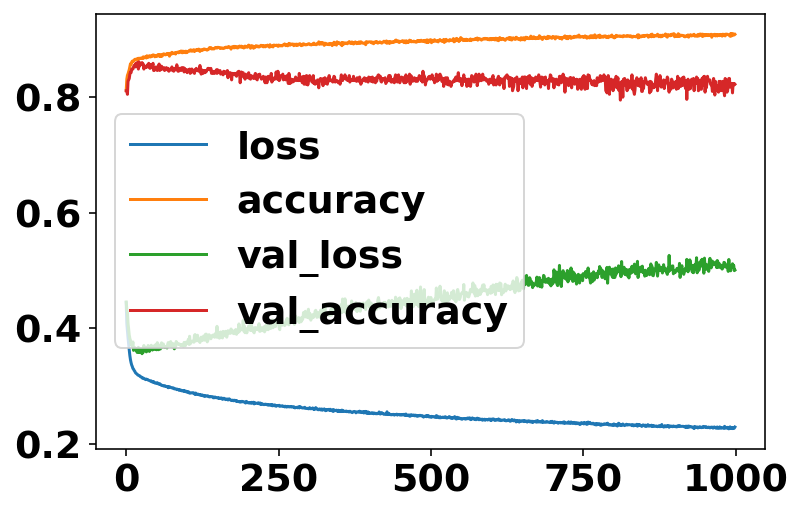

In [81]:
loss_df.plot();

In [82]:
model.evaluate(X_test, y_test, verbose=0)

[0.49579960107803345, 0.8309999704360962]

In [83]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.49579960107803345
accuracy :  0.8309999704360962


In [84]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1444  129]
 [ 209  218]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      1573
           1       0.63      0.51      0.56       427

    accuracy                           0.83      2000
   macro avg       0.75      0.71      0.73      2000
weighted avg       0.82      0.83      0.82      2000



# EarlyStopping

In [85]:
from tensorflow.keras.callbacks import EarlyStopping

In [86]:
model = Sequential()

model.add(Dense(30, activation = "relu"))
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [87]:
#The patience is often set somewhere between 10 and 100 (10 or 20 is more common), 
#but it really depends on your dataset and network.

In [88]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [89]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
225/225 [==============================] - 1s 3ms/step - loss: 0.4680 - accuracy: 0.8000 - val_loss: 0.4628 - val_accuracy: 0.7738
Epoch 2/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4188 - accuracy: 0.8222 - val_loss: 0.4443 - val_accuracy: 0.7900
Epoch 3/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.4091 - accuracy: 0.8296 - val_loss: 0.4350 - val_accuracy: 0.8100
Epoch 4/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.4007 - accuracy: 0.8343 - val_loss: 0.4285 - val_accuracy: 0.8087
Epoch 5/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.3934 - accuracy: 0.8397 - val_loss: 0.4253 - val_accuracy: 0.8175
Epoch 6/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.3848 - accuracy: 0.8429 - val_loss: 0.4138 - val_accuracy: 0.8213
Epoch 7/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.3734 - accuracy: 0.8451 - val_loss: 0.4013 - val_accuracy:

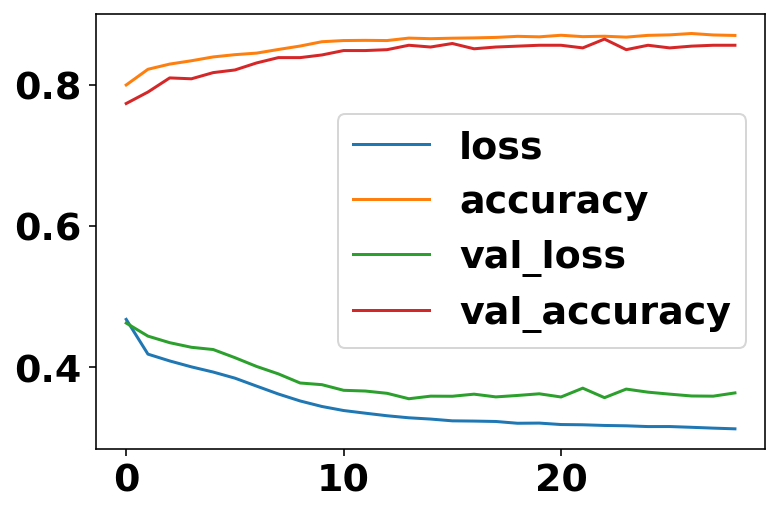

In [90]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [143]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1455   88]
 [ 238 1305]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1543
           1       0.94      0.85      0.89      1543

    accuracy                           0.89      3086
   macro avg       0.90      0.89      0.89      3086
weighted avg       0.90      0.89      0.89      3086



# learning_rate

In [152]:
from tensorflow.keras.optimizers import Adam

In [153]:
model = Sequential()

model.add(Dense(30, activation = "relu"))
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [154]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [155]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4911 - accuracy: 0.7603 - val_loss: 0.5602 - val_accuracy: 0.7142
Epoch 2/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4274 - accuracy: 0.8011 - val_loss: 0.4467 - val_accuracy: 0.7710
Epoch 3/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4093 - accuracy: 0.8092 - val_loss: 0.4827 - val_accuracy: 0.7542
Epoch 4/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4006 - accuracy: 0.8135 - val_loss: 0.4125 - val_accuracy: 0.8127
Epoch 5/1000
352/352 [==============================] - 1s 1ms/step - loss: 0.3942 - accuracy: 0.8177 - val_loss: 0.4478 - val_accuracy: 0.7878
Epoch 6/1000
352/352 [==============================] - 0s 1ms/step - loss: 0.3903 - accuracy: 0.8191 - val_loss: 0.3636 - val_accuracy: 0.8407
Epoch 7/1000
352/352 [==============================] - 0s 1ms/step - loss: 0.3843 - accuracy: 0.8237 - val_loss: 0.4379 - val_accuracy:

<AxesSubplot:>

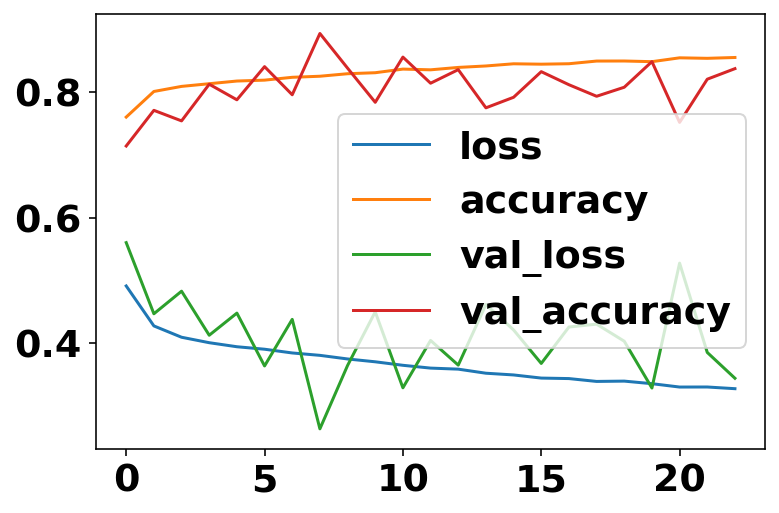

In [156]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [157]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1291  252]
 [ 393 1150]]
              precision    recall  f1-score   support

           0       0.77      0.84      0.80      1543
           1       0.82      0.75      0.78      1543

    accuracy                           0.79      3086
   macro avg       0.79      0.79      0.79      3086
weighted avg       0.79      0.79      0.79      3086



# Dropout

In [158]:
from tensorflow.keras.layers import Dropout

In [159]:
model = Sequential()

model.add(Dense(30, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(15, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [160]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1)

Epoch 1/1000
352/352 [==============================] - 2s 3ms/step - loss: 0.6465 - accuracy: 0.6316 - val_loss: 0.6985 - val_accuracy: 0.6245
Epoch 2/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.5855 - accuracy: 0.7046 - val_loss: 0.6363 - val_accuracy: 0.6789
Epoch 3/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.5720 - accuracy: 0.7166 - val_loss: 0.6144 - val_accuracy: 0.6709
Epoch 4/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.5571 - accuracy: 0.7283 - val_loss: 0.6103 - val_accuracy: 0.6677
Epoch 5/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.5500 - accuracy: 0.7363 - val_loss: 0.5788 - val_accuracy: 0.6749
Epoch 6/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.5462 - accuracy: 0.7417 - val_loss: 0.5480 - val_accuracy: 0.7062
Epoch 7/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.5337 - accuracy: 0.7465 - val_loss: 0.5674 - val_accuracy:

352/352 [==============================] - 1s 2ms/step - loss: 0.4532 - accuracy: 0.7887 - val_loss: 0.4467 - val_accuracy: 0.7614
Epoch 58/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4398 - accuracy: 0.7921 - val_loss: 0.4091 - val_accuracy: 0.7798
Epoch 59/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4468 - accuracy: 0.7908 - val_loss: 0.4389 - val_accuracy: 0.7454
Epoch 60/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4500 - accuracy: 0.7871 - val_loss: 0.4586 - val_accuracy: 0.7398
Epoch 61/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4479 - accuracy: 0.7884 - val_loss: 0.4594 - val_accuracy: 0.7462
Epoch 62/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4506 - accuracy: 0.7907 - val_loss: 0.4290 - val_accuracy: 0.7638
Epoch 63/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4488 - accuracy: 0.7943 - val_loss: 0.4482 - val_accuracy: 0.7430

352/352 [==============================] - 0s 1ms/step - loss: 0.4441 - accuracy: 0.7909 - val_loss: 0.4250 - val_accuracy: 0.7838
Epoch 114/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4356 - accuracy: 0.7962 - val_loss: 0.4241 - val_accuracy: 0.7790
Epoch 115/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4373 - accuracy: 0.7953 - val_loss: 0.4439 - val_accuracy: 0.7598
Epoch 116/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4432 - accuracy: 0.7926 - val_loss: 0.4304 - val_accuracy: 0.7822
Epoch 117/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4459 - accuracy: 0.7905 - val_loss: 0.4469 - val_accuracy: 0.7550
Epoch 118/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4424 - accuracy: 0.7928 - val_loss: 0.4322 - val_accuracy: 0.7814
Epoch 119/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4426 - accuracy: 0.7943 - val_loss: 0.4260 - val_accuracy: 

352/352 [==============================] - 1s 2ms/step - loss: 0.4446 - accuracy: 0.7965 - val_loss: 0.4158 - val_accuracy: 0.7854
Epoch 170/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4335 - accuracy: 0.7960 - val_loss: 0.4411 - val_accuracy: 0.7638
Epoch 171/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4390 - accuracy: 0.7984 - val_loss: 0.4362 - val_accuracy: 0.7726
Epoch 172/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4399 - accuracy: 0.7956 - val_loss: 0.4499 - val_accuracy: 0.7646
Epoch 173/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4410 - accuracy: 0.8018 - val_loss: 0.4251 - val_accuracy: 0.7766
Epoch 174/1000
352/352 [==============================] - 1s 1ms/step - loss: 0.4354 - accuracy: 0.7994 - val_loss: 0.4389 - val_accuracy: 0.7766
Epoch 175/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4423 - accuracy: 0.7971 - val_loss: 0.4199 - val_accuracy: 

352/352 [==============================] - 1s 2ms/step - loss: 0.4382 - accuracy: 0.7996 - val_loss: 0.4404 - val_accuracy: 0.7662
Epoch 226/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4430 - accuracy: 0.7904 - val_loss: 0.4441 - val_accuracy: 0.7542
Epoch 227/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4343 - accuracy: 0.7990 - val_loss: 0.3975 - val_accuracy: 0.8006
Epoch 228/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4416 - accuracy: 0.7971 - val_loss: 0.4409 - val_accuracy: 0.7734
Epoch 229/1000
352/352 [==============================] - 1s 1ms/step - loss: 0.4323 - accuracy: 0.7989 - val_loss: 0.4135 - val_accuracy: 0.7862
Epoch 230/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4389 - accuracy: 0.7979 - val_loss: 0.4171 - val_accuracy: 0.7918
Epoch 231/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4415 - accuracy: 0.7990 - val_loss: 0.4572 - val_accuracy: 

352/352 [==============================] - 1s 2ms/step - loss: 0.4365 - accuracy: 0.7942 - val_loss: 0.4249 - val_accuracy: 0.7726
Epoch 282/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4350 - accuracy: 0.8003 - val_loss: 0.4099 - val_accuracy: 0.7798
Epoch 283/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4398 - accuracy: 0.7969 - val_loss: 0.4227 - val_accuracy: 0.7774
Epoch 284/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4312 - accuracy: 0.7957 - val_loss: 0.4267 - val_accuracy: 0.7750
Epoch 285/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4357 - accuracy: 0.7950 - val_loss: 0.4252 - val_accuracy: 0.7758
Epoch 286/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4378 - accuracy: 0.7949 - val_loss: 0.4266 - val_accuracy: 0.7742
Epoch 287/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4356 - accuracy: 0.7964 - val_loss: 0.4118 - val_accuracy: 

352/352 [==============================] - 1s 2ms/step - loss: 0.4392 - accuracy: 0.7967 - val_loss: 0.4272 - val_accuracy: 0.7806
Epoch 338/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4355 - accuracy: 0.7975 - val_loss: 0.4258 - val_accuracy: 0.7782
Epoch 339/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4359 - accuracy: 0.7979 - val_loss: 0.4245 - val_accuracy: 0.7822
Epoch 340/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4361 - accuracy: 0.7992 - val_loss: 0.4172 - val_accuracy: 0.7822
Epoch 341/1000
352/352 [==============================] - 1s 3ms/step - loss: 0.4352 - accuracy: 0.7992 - val_loss: 0.4124 - val_accuracy: 0.7870
Epoch 342/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4413 - accuracy: 0.7989 - val_loss: 0.4258 - val_accuracy: 0.7766
Epoch 343/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4360 - accuracy: 0.7988 - val_loss: 0.4342 - val_accuracy: 

Epoch 393/1000
352/352 [==============================] - 0s 1ms/step - loss: 0.4384 - accuracy: 0.7956 - val_loss: 0.4150 - val_accuracy: 0.7734
Epoch 394/1000
352/352 [==============================] - 0s 1ms/step - loss: 0.4327 - accuracy: 0.7994 - val_loss: 0.4271 - val_accuracy: 0.7662
Epoch 395/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4366 - accuracy: 0.7979 - val_loss: 0.4282 - val_accuracy: 0.7694
Epoch 396/1000
352/352 [==============================] - 1s 1ms/step - loss: 0.4317 - accuracy: 0.8039 - val_loss: 0.4131 - val_accuracy: 0.7942
Epoch 397/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4344 - accuracy: 0.8020 - val_loss: 0.4150 - val_accuracy: 0.7926
Epoch 398/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4289 - accuracy: 0.7992 - val_loss: 0.4283 - val_accuracy: 0.7798
Epoch 399/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4345 - accuracy: 0.7964 - val_loss: 0.4253 -

352/352 [==============================] - 1s 3ms/step - loss: 0.4351 - accuracy: 0.8015 - val_loss: 0.4298 - val_accuracy: 0.7686
Epoch 450/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4280 - accuracy: 0.7985 - val_loss: 0.4049 - val_accuracy: 0.7950
Epoch 451/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4368 - accuracy: 0.7986 - val_loss: 0.4014 - val_accuracy: 0.7854
Epoch 452/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4449 - accuracy: 0.7923 - val_loss: 0.4337 - val_accuracy: 0.7750
Epoch 453/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4338 - accuracy: 0.7985 - val_loss: 0.4299 - val_accuracy: 0.7686
Epoch 454/1000
352/352 [==============================] - 1s 3ms/step - loss: 0.4393 - accuracy: 0.8006 - val_loss: 0.3968 - val_accuracy: 0.7918
Epoch 455/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4328 - accuracy: 0.7985 - val_loss: 0.4393 - val_accuracy: 

352/352 [==============================] - 1s 2ms/step - loss: 0.4363 - accuracy: 0.7989 - val_loss: 0.4237 - val_accuracy: 0.7838
Epoch 506/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4359 - accuracy: 0.7929 - val_loss: 0.4276 - val_accuracy: 0.7742
Epoch 507/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4280 - accuracy: 0.7965 - val_loss: 0.4236 - val_accuracy: 0.7798
Epoch 508/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4320 - accuracy: 0.7985 - val_loss: 0.4137 - val_accuracy: 0.7902
Epoch 509/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4323 - accuracy: 0.8018 - val_loss: 0.4249 - val_accuracy: 0.7758
Epoch 510/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4341 - accuracy: 0.8014 - val_loss: 0.4235 - val_accuracy: 0.7734
Epoch 511/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4348 - accuracy: 0.8004 - val_loss: 0.4207 - val_accuracy: 

352/352 [==============================] - 1s 2ms/step - loss: 0.4337 - accuracy: 0.7974 - val_loss: 0.4347 - val_accuracy: 0.7790
Epoch 562/1000
352/352 [==============================] - 1s 1ms/step - loss: 0.4332 - accuracy: 0.8034 - val_loss: 0.4131 - val_accuracy: 0.7838
Epoch 563/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4290 - accuracy: 0.7978 - val_loss: 0.4110 - val_accuracy: 0.7766
Epoch 564/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4371 - accuracy: 0.7979 - val_loss: 0.4015 - val_accuracy: 0.7958
Epoch 565/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4364 - accuracy: 0.7990 - val_loss: 0.4176 - val_accuracy: 0.7742
Epoch 566/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4283 - accuracy: 0.7999 - val_loss: 0.3947 - val_accuracy: 0.8014
Epoch 567/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4287 - accuracy: 0.8022 - val_loss: 0.4220 - val_accuracy: 

352/352 [==============================] - 1s 2ms/step - loss: 0.4366 - accuracy: 0.7947 - val_loss: 0.4084 - val_accuracy: 0.7734
Epoch 618/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4339 - accuracy: 0.8005 - val_loss: 0.4379 - val_accuracy: 0.7566
Epoch 619/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4368 - accuracy: 0.7967 - val_loss: 0.4090 - val_accuracy: 0.7782
Epoch 620/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4376 - accuracy: 0.7947 - val_loss: 0.4033 - val_accuracy: 0.7822
Epoch 621/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4289 - accuracy: 0.8021 - val_loss: 0.3998 - val_accuracy: 0.7934
Epoch 622/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4309 - accuracy: 0.7957 - val_loss: 0.4280 - val_accuracy: 0.7630
Epoch 623/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4296 - accuracy: 0.8007 - val_loss: 0.4103 - val_accuracy: 

352/352 [==============================] - 1s 2ms/step - loss: 0.4364 - accuracy: 0.8001 - val_loss: 0.4054 - val_accuracy: 0.7878
Epoch 674/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4335 - accuracy: 0.8006 - val_loss: 0.4293 - val_accuracy: 0.7694
Epoch 675/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4356 - accuracy: 0.7957 - val_loss: 0.4134 - val_accuracy: 0.7862
Epoch 676/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4331 - accuracy: 0.7973 - val_loss: 0.4121 - val_accuracy: 0.7934
Epoch 677/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4328 - accuracy: 0.8014 - val_loss: 0.4138 - val_accuracy: 0.7782
Epoch 678/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4309 - accuracy: 0.8004 - val_loss: 0.4221 - val_accuracy: 0.7790
Epoch 679/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4389 - accuracy: 0.7965 - val_loss: 0.4039 - val_accuracy: 

352/352 [==============================] - 0s 1ms/step - loss: 0.4299 - accuracy: 0.8017 - val_loss: 0.4180 - val_accuracy: 0.7798
Epoch 730/1000
352/352 [==============================] - 0s 1ms/step - loss: 0.4321 - accuracy: 0.8004 - val_loss: 0.4288 - val_accuracy: 0.7702
Epoch 731/1000
352/352 [==============================] - 0s 1ms/step - loss: 0.4346 - accuracy: 0.7995 - val_loss: 0.4225 - val_accuracy: 0.7870
Epoch 732/1000
352/352 [==============================] - 0s 1ms/step - loss: 0.4349 - accuracy: 0.8001 - val_loss: 0.4034 - val_accuracy: 0.7854
Epoch 733/1000
352/352 [==============================] - 0s 1ms/step - loss: 0.4322 - accuracy: 0.8021 - val_loss: 0.4105 - val_accuracy: 0.7846
Epoch 734/1000
352/352 [==============================] - 1s 1ms/step - loss: 0.4305 - accuracy: 0.7973 - val_loss: 0.4077 - val_accuracy: 0.7894
Epoch 735/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4287 - accuracy: 0.8027 - val_loss: 0.4083 - val_accuracy: 

352/352 [==============================] - 0s 1ms/step - loss: 0.4295 - accuracy: 0.8019 - val_loss: 0.4112 - val_accuracy: 0.7814
Epoch 786/1000
352/352 [==============================] - 0s 1ms/step - loss: 0.4312 - accuracy: 0.7991 - val_loss: 0.4048 - val_accuracy: 0.7886
Epoch 787/1000
352/352 [==============================] - 0s 1ms/step - loss: 0.4339 - accuracy: 0.7982 - val_loss: 0.4276 - val_accuracy: 0.7702
Epoch 788/1000
352/352 [==============================] - 0s 1ms/step - loss: 0.4336 - accuracy: 0.7968 - val_loss: 0.4159 - val_accuracy: 0.7758
Epoch 789/1000
352/352 [==============================] - 1s 1ms/step - loss: 0.4335 - accuracy: 0.8039 - val_loss: 0.4110 - val_accuracy: 0.7878
Epoch 790/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4277 - accuracy: 0.8019 - val_loss: 0.4187 - val_accuracy: 0.7798
Epoch 791/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4326 - accuracy: 0.7956 - val_loss: 0.4352 - val_accuracy: 

352/352 [==============================] - 0s 1ms/step - loss: 0.4249 - accuracy: 0.8028 - val_loss: 0.4212 - val_accuracy: 0.7686
Epoch 842/1000
352/352 [==============================] - 0s 1ms/step - loss: 0.4321 - accuracy: 0.7957 - val_loss: 0.4294 - val_accuracy: 0.7622
Epoch 843/1000
352/352 [==============================] - 0s 1ms/step - loss: 0.4291 - accuracy: 0.8018 - val_loss: 0.4122 - val_accuracy: 0.7742
Epoch 844/1000
352/352 [==============================] - 0s 1ms/step - loss: 0.4337 - accuracy: 0.8007 - val_loss: 0.4263 - val_accuracy: 0.7718
Epoch 845/1000
352/352 [==============================] - 0s 1ms/step - loss: 0.4304 - accuracy: 0.7998 - val_loss: 0.4118 - val_accuracy: 0.7790
Epoch 846/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4353 - accuracy: 0.7974 - val_loss: 0.4216 - val_accuracy: 0.7758
Epoch 847/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4345 - accuracy: 0.7989 - val_loss: 0.4205 - val_accuracy: 

352/352 [==============================] - 1s 2ms/step - loss: 0.4334 - accuracy: 0.8006 - val_loss: 0.3988 - val_accuracy: 0.7942
Epoch 898/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4315 - accuracy: 0.8018 - val_loss: 0.4211 - val_accuracy: 0.7806
Epoch 899/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4351 - accuracy: 0.7998 - val_loss: 0.4288 - val_accuracy: 0.7734
Epoch 900/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4325 - accuracy: 0.8029 - val_loss: 0.4092 - val_accuracy: 0.7934
Epoch 901/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4274 - accuracy: 0.7998 - val_loss: 0.4128 - val_accuracy: 0.7814
Epoch 902/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4297 - accuracy: 0.8031 - val_loss: 0.4135 - val_accuracy: 0.7886
Epoch 903/1000
352/352 [==============================] - 1s 2ms/step - loss: 0.4331 - accuracy: 0.8008 - val_loss: 0.4366 - val_accuracy: 

352/352 [==============================] - 1s 2ms/step - loss: 0.4250 - accuracy: 0.8035 - val_loss: 0.4301 - val_accuracy: 0.7630
Epoch 954/1000
352/352 [==============================] - 1s 1ms/step - loss: 0.4279 - accuracy: 0.7994 - val_loss: 0.4290 - val_accuracy: 0.7670
Epoch 955/1000
352/352 [==============================] - 0s 1ms/step - loss: 0.4316 - accuracy: 0.8015 - val_loss: 0.4270 - val_accuracy: 0.7630
Epoch 956/1000
352/352 [==============================] - 0s 1ms/step - loss: 0.4364 - accuracy: 0.7995 - val_loss: 0.4273 - val_accuracy: 0.7734
Epoch 957/1000
352/352 [==============================] - 0s 1ms/step - loss: 0.4347 - accuracy: 0.8015 - val_loss: 0.4200 - val_accuracy: 0.7726
Epoch 958/1000
352/352 [==============================] - 0s 1ms/step - loss: 0.4322 - accuracy: 0.8014 - val_loss: 0.4254 - val_accuracy: 0.7726
Epoch 959/1000
352/352 [==============================] - 0s 1ms/step - loss: 0.4242 - accuracy: 0.8011 - val_loss: 0.4086 - val_accuracy: 

In [168]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

TypeError: no numeric data to plot

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Saving Final Model and Scaler

In [ ]:
import pickle
pickle.dump(scaler, open("scaler_cancer", 'wb'))

In [ ]:
model = Sequential()

model.add(Dense(30, activation = "relu"))
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [ ]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 64, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
model.save('model_cancer.h5')

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [167]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1434  109]
 [ 343 1200]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.86      1543
           1       0.92      0.78      0.84      1543

    accuracy                           0.85      3086
   macro avg       0.86      0.85      0.85      3086
weighted avg       0.86      0.85      0.85      3086



# 8) Reporting
The aim of this study was to create classification models for the churn dataset and to predict whether a person abandons us by creating models and to obtain maximum accuracy score in the established models. The work done is as follows:

1) Churn Data Set read.

2) With Exploratory Data Analysis; The data set's structural data were checked. The types of variables in the dataset were examined. Size information of the dataset was accessed. Descriptive statistics of the data set were examined. It was concluded that there were no missing observations and outliers in the data set.

4) During Model Building; Logistic Regression, KNN, SVM, CART, Random Forests, XGBoost, LightGBM, CatBoost like using machine learning models Accuracy  Score were calculated. Later XGBoost, LightGBM, CatBoost hyperparameter optimizations optimized to increase Accuracy score.

5) Result; The model created as a result of LightGBM hyperparameter optimization became the model with the maxium Accuracy Score. **(0.9116)**